## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import seaborn as sns
import scipy

## Importing Data

In [4]:
# main folder
path = r'C:\Users\steve\Documents\11.24 Instacart Basket Analysis'

# final_dataset
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

# departments
dep_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'department_wrangled.csv'))

## Define Variables

### Style Guide

In [8]:
# chart style
sns.set_style('darkgrid')

# colors
gray = '#C1C7C9'

#busyness ---------------
green = '#3CBC31'
light_green = '#7CC575'
greyed_red = '#D7BBB4'

#spending ----------------
blue = '#42A5F5'
light_blue = '#90CAF9'

#price --------------------
yellow = '#FFE388'
orange = '#FFA569'
red = '#FF8080'

#customer profiles ---------
# - loyalty
light_teal = '#38B4B4'
teal = '#287979'
dark_teal = '#174D4D'
# - region
light_teal2 = '#A3EDE7'
teal2 = '#4EB8B0'
dark_teal2 = '#2A8973'
# - age
light_teal3 = '#CEF3F3'
teal3 = '#A0d2D3'
dark_teal3 = '#72B1B2'
# - dependents
light_teal4 = '#99D6E0'
teal4 = '#66C1D0'
dark_teal4 = '#0099B2'
# - income
light_teal5 = '#CFEFEF'
teal5 = '#99D4D4'
dark_teal5 = '#66B2B2'

**Pd Display Settings** 

In [10]:
pd.set_option('display.max_columns', 35)

## Data Frame

In [91]:
df.head(1)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,day_busyness,busiest_days,hour_of_day_busyness,max_order,loyalty_flag,avg_spent,spending_flag,med_days_since_prior_order,frequency_label,gender,state,age,date_joined,dependents,fam_status,income,region,age_group,income_group,dependents_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,south,adult,lower class,Has dependents


## Visualizations

### Key Question 1 - DAILY & HOURLY BUSYNESS -------------------------------

**Busiest Day of Week**

In [ ]:
# count number of orders by day of week
orders_per_day = df['order_day_of_week'].value_counts(dropna = False)
orders_per_day

Text(0.5, 1.0, 'Number of Orders per Day')

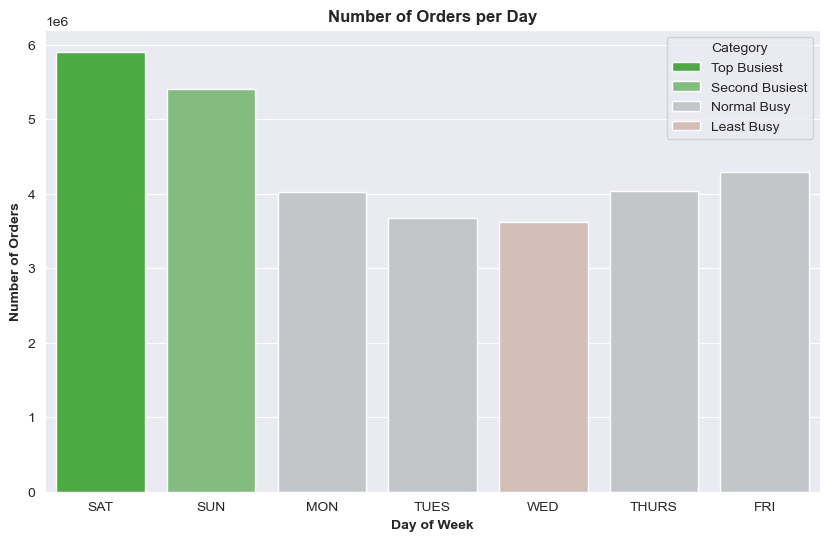

In [246]:
# ---- SETUP DF --------------------

# reset df index and store column names
orders_per_day_df = orders_per_day.reset_index()
orders_per_day_df.columns = ['day', 'order_count']

# ---- CATEGORIZE --------------------

# store top 2 busiest days
top_two = orders_per_day.nlargest(2)

# Categorze the hours by Top, Second, Least, and Normal
orders_per_day_df['Category'] = orders_per_day_df['day'].apply(
    lambda x: 'Top Busiest' if x == top_two.index[0] else
              ('Second Busiest' if x == top_two.index[1] else
              ('Least Busy' if x in orders_per_day.nsmallest(1) else 'Normal Busy')))

# ---- CREATE CHART --------------------

# set size
plt.figure(figsize=(10,6))

# create bar chart
orders_per_day_barchart = sns.barplot(x='day', y='order_count', hue='Category', 
                                       data=orders_per_day_df, 
                                       palette={'Top Busiest': green, 'Second Busiest': light_green, 'Least Busy': greyed_red, 'Normal Busy': gray})

# ---- LABELS --------------------

# store days of week in list for tick labels
days_of_week = ['SAT', 'SUN', 'MON', 'TUES', 'WED', 'THURS', 'FRI']
# set x-axis tick labels
plt.xticks(ticks=range(len(orders_per_day.index)), labels= days_of_week)

# axis labels and title
plt.xlabel('Day of Week', fontweight='bold')
plt.ylabel('Number of Orders', fontweight='bold')
plt.title('Number of Orders per Day', fontweight='bold')

**Busiest Hour**

In [ ]:
# count the number of orders by hour of day
orders_per_hour = df['order_hour_of_day'].value_counts(dropna = False)
orders_per_hour

Text(0.5, 1.0, 'Number of Orders per Hour')

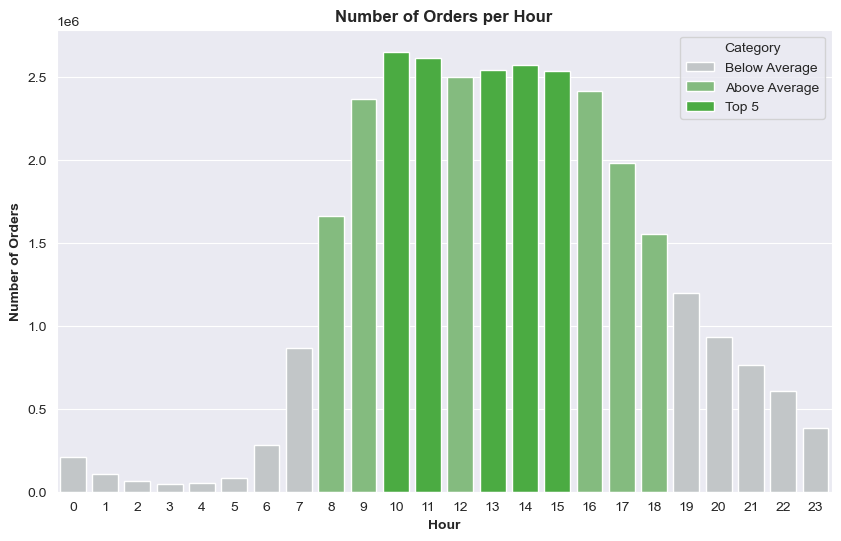

In [63]:
# ---- SETUP DF --------------------

# reset df index and store column names
orders_per_hour_df = orders_per_hour.reset_index()
orders_per_hour_df.columns = ['hour', 'order_count']

# ---- CATEGORIZE --------------------

# store the hours with above average number of orders
hours_above_average = orders_per_hour[orders_per_hour > orders_per_hour.mean()].index

# Categorze the hours by Top 5, Above Average, and Below Average
orders_per_hour_df['Category'] = orders_per_hour_df['hour'].apply(
    lambda x: 'Top 5' if x in orders_per_hour.nlargest(5).index else
              ('Above Average' if x in hours_above_average else 'Below Average'))

# ---- CREATE CHART --------------------

# set size
plt.figure(figsize=(10,6))

# create bar chart
orders_per_hour_barchart = sns.barplot(x='hour', y='order_count', hue='Category', 
                                       data=orders_per_hour_df, 
                                       palette={'Top 5': green, 'Above Average': light_green, 'Below Average': gray})

# ---- LABELS --------------------

# axis labels and title
plt.xlabel('Hour', fontweight='bold')
plt.ylabel('Number of Orders', fontweight='bold')
plt.title('Number of Orders per Hour', fontweight='bold')

### Key Question 2 - HOURLY MONEY SPENT ----------------------------------

**Total Amount Spent by Hour**

In [ ]:
# store the total prices spent by hour
total_spent_per_hour = df.groupby('order_hour_of_day')['prices'].sum()
total_spent_per_hour

Text(0.5, 1.0, 'Customer Spending per Hour')

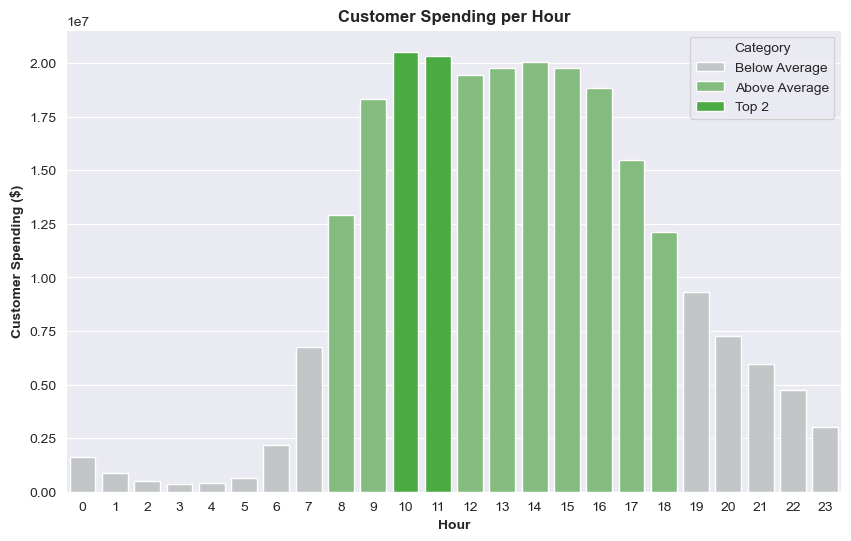

In [437]:
# ---- SETUP DF --------------------

# reset df index and store column names
total_per_hour_df = total_spent_per_hour.reset_index()
total_per_hour_df.columns = ['hour', 'total_spent']

# ---- CATEGORIZE --------------------

# store the hours with above average number of orders
hours_above_avg = total_spent_per_hour[total_spent_per_hour > total_spent_per_hour.mean()].index

# Categorze the hours by Top 2, Above Average, and Below Average
total_per_hour_df['Category'] = total_per_hour_df['hour'].apply(
    lambda x: 'Top 2' if x in total_spent_per_hour.nlargest(2).index else
              ('Above Average' if x in hours_above_avg else 'Below Average'))

# ---- CREATE CHART --------------------

# set size
plt.figure(figsize=(10,6))

# create bar chart
total_per_hour_barchart = sns.barplot(x='hour', y='total_spent', hue='Category', 
                                       data=total_per_hour_df, 
                                       palette={'Top 2': green, 'Above Average': light_green, 'Below Average': gray})

# ---- LABELS --------------------

# axis labels and title
plt.xlabel('Hour', fontweight='bold')
plt.ylabel('Customer Spending ($)', fontweight='bold')
plt.title('Customer Spending per Hour', fontweight='bold')

**Average Order Total by Hour**

In [ ]:
# ---- CALCULATE AVG ORDER TOTAL PER HOUR -----------
# store a user's order total i.e. the total of their 'prices' by 'user_id' and 'order_number'
order_total = df.groupby(['user_id', 'order_number'])['prices'].sum().reset_index()

# match the hour of day to those totals i.e. merge the 'order_hour_of_day' onto order_total
order_total = order_total.merge(df[['user_id', 'order_number', 'order_hour_of_day']], 
                                on=['user_id', 'order_number'], 
                                how='left')

# store the avg order total by hour i.e. group order_total by hour and calculate the 'prices' avg
avg_total_per_hour = order_total.groupby('order_hour_of_day')['prices'].mean().round(2)
avg_total_per_hour

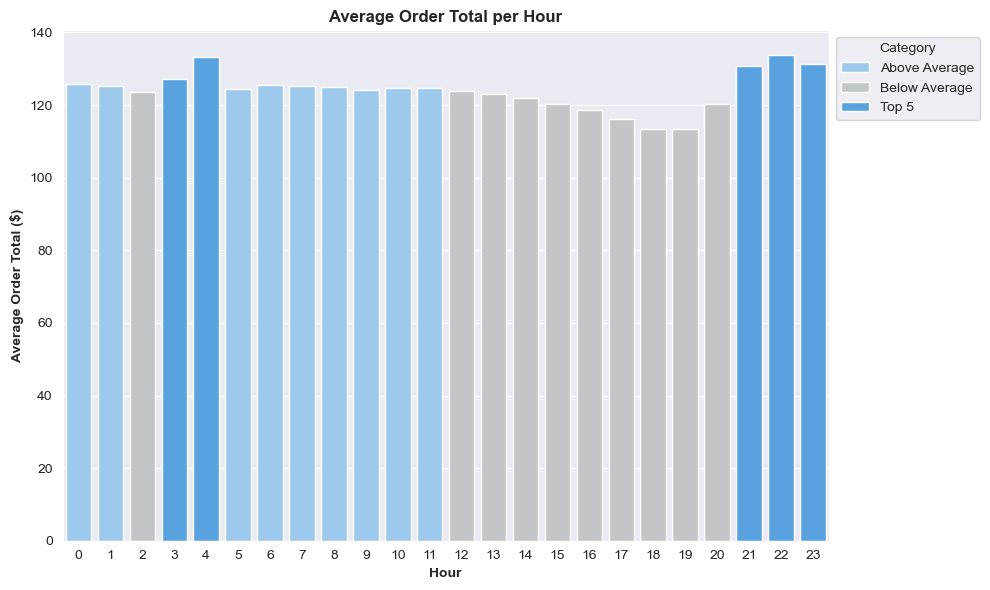

In [423]:
# ---- SETUP DF --------------------

# reset df index and store column names
total_per_hour_df = avg_total_per_hour.reset_index()
total_per_hour_df.columns = ['hour', 'avg_order_total']

# ---- CATEGORIZE --------------------

# store the hours with above average number of orders
hours_above_avg = avg_total_per_hour[avg_total_per_hour > avg_total_per_hour.mean()].index

# Categorze the hours by Top 5, Above Average, and Below Average
total_per_hour_df['category'] = total_per_hour_df['hour'].apply(
    lambda x: 'Top 5' if x in avg_total_per_hour.nlargest(5).index else
              ('Above Average' if x in hours_above_avg else 'Below Average'))

# ---- CREATE CHART --------------------

# set size
plt.figure(figsize=(10,6))

# create bar chart
avgOrderTotal_perHour_barchart = sns.barplot(x='hour', y='avg_order_total', hue='category', 
                                       data=total_per_hour_df, 
                                       palette={'Top 5': blue, 'Above Average': light_blue, 'Below Average': gray})

# ---- LABELS --------------------

# move the legend - was overlapping right columns
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))

# axis labels and title
plt.xlabel('Hour', fontweight='bold')
plt.ylabel('Average Order Total ($)', fontweight='bold')
plt.title('Average Order Total per Hour', fontweight='bold')
plt.tight_layout()

**Average Price of Product in Order Per Hour**

In [228]:
df['prices'].mean()

7.790590247246386

In [ ]:
# ---- CALCULATE AVG PRICE OF PRODUCT BOUGHT PER HOUR -----------
# store the average price of a product in an order i.e. the average of the 'prices' by 'user_id' and 'order_number'
avg_item_price_in_order = df.groupby(['user_id', 'order_number'])['prices'].mean().reset_index()

# match the hour of day to those totals i.e. merge the 'order_hour_of_day' onto avg_item_price_in_order 
avg_item_price_in_order = avg_item_price_in_order .merge(df[['user_id', 'order_number', 'order_hour_of_day']], 
                                on=['user_id', 'order_number'], 
                                how='left')

# store the avg price by hour i.e. avg_item_price_in_order by hour and calculate the 'prices' avg
avg_price_per_hour = avg_price_item_order.groupby('order_hour_of_day')['prices'].mean().round(2)
avg_price_per_hour

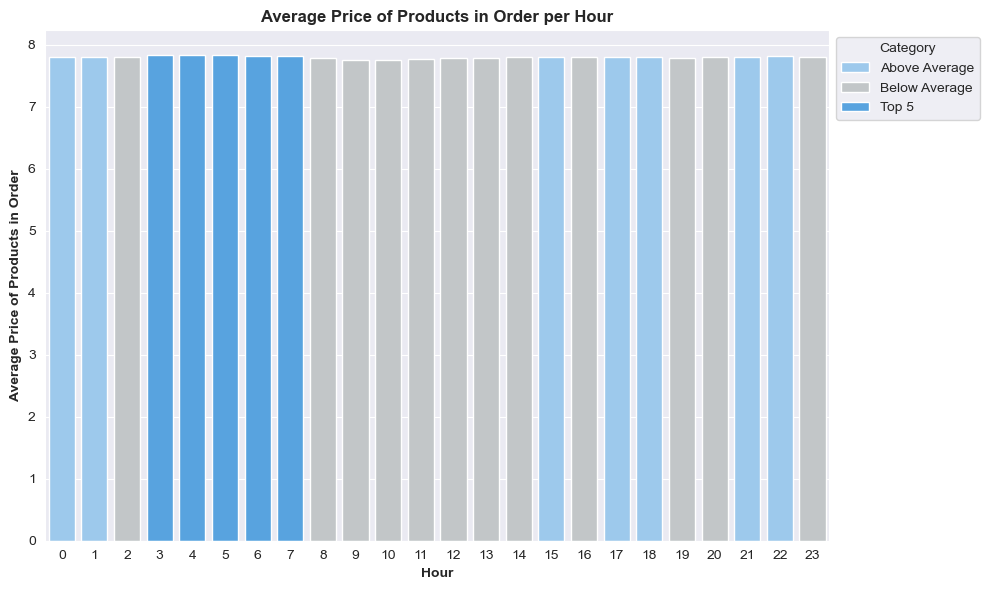

In [447]:
# ---- SETUP DF --------------------

# reset df index and store column names
avg_price_per_hour_df = avg_price_per_hour.reset_index()
avg_price_per_hour_df.columns = ['hour', 'avg_price']

# ---- CATEGORIZE --------------------

# store the hours with above average average item price
hours_above_avg = avg_price_per_hour[avg_price_per_hour > avg_price_per_hour.mean()].index

# Categorze the hours by Top 5, Above Average, and Below Average
avg_price_per_hour_df['Category'] = avg_price_per_hour_df['hour'].apply(
    lambda x: 'Top 5' if x in avg_price_per_hour.nlargest(5).index else
              ('Above Average' if x in hours_above_avg else 'Below Average'))

# ---- CREATE CHART --------------------

# set size
plt.figure(figsize=(10,6))

# create bar chart
avg_price_per_hour_barchart = sns.barplot(x='hour', y='avg_price', hue='Category', 
                                       data=avg_price_per_hour_df, 
                                       palette={'Top 5': blue, 'Above Average': light_blue, 'Below Average': gray})

# ---- LABELS --------------------

# move the legend - was overlapping right columns
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))

# axis labels and title
plt.xlabel('Hour', fontweight='bold')
plt.ylabel('Average Price of Products in Order', fontweight='bold')
plt.title('Average Price of Products in Order per Hour', fontweight='bold')
plt.tight_layout()

**Average Number of Items in Order Per Hour**

In [ ]:
# ---- CALCULATE AVG NUMBER OF ITEMS IN ORDER PER HOUR -----------
# store the number of items in a user's order i.e. the count of their 'product_name' by 'user_id' and 'order_number'
num_items_order = df.groupby(['user_id', 'order_number'])['product_name'].count().reset_index()

# match the hour of day to those totals i.e. merge the 'order_hour_of_day' onto num_items_order
num_items_order  = num_items_order.merge(df[['user_id', 'order_number', 'order_hour_of_day']], 
                                on=['user_id', 'order_number'], 
                                how='left')

# store the avg number of items in an order by hour i.e. group num_items_order by hour and calculate the 'product_name' avg
avg_items_per_hour = num_items_order.groupby('order_hour_of_day')['product_name'].mean().round(2)
avg_items_per_hour

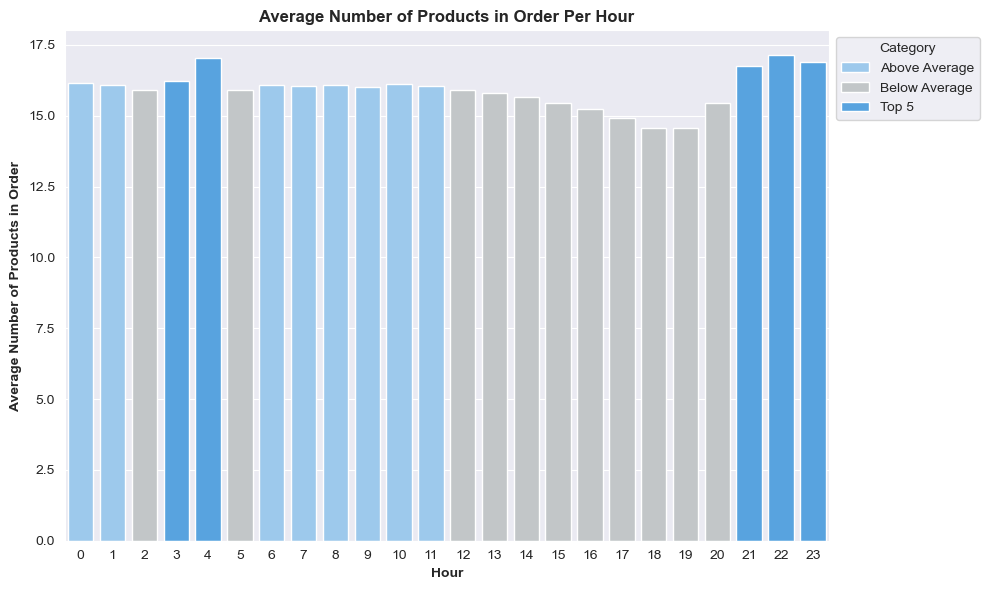

In [419]:
# ---- SETUP DF --------------------

# reset df index and store column names
avg_items_per_hour_df = avg_items_per_hour.reset_index()
avg_items_per_hour_df.columns = ['hour', 'avg_num_of_items']

# ---- CATEGORIZE --------------------

# store the hours with above average item counts
hours_above_avg = avg_items_per_hour[avg_items_per_hour > avg_items_per_hour.mean()].index

# Categorze the hours by Top 5, Above Average, and Below Average
avg_items_per_hour_df['Category'] = avg_items_per_hour_df['hour'].apply(
    lambda x: 'Top 5' if x in avg_items_per_hour.nlargest(5).index else
              ('Above Average' if x in hours_above_avg else 'Below Average'))

# ---- CREATE CHART --------------------

# set size
plt.figure(figsize=(10,6))

# create bar chart
avg_items_per_hour_barchart = sns.barplot(x='hour', y='avg_num_of_items', hue='Category', 
                                       data=avg_items_per_hour_df, 
                                       palette={'Top 5': blue, 'Above Average': light_blue, 'Below Average': gray})

# ---- LABELS --------------------

# move the legend - was overlapping right columns
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))

# axis labels and title
plt.xlabel('Hour', fontweight='bold')
plt.ylabel('Average Number of Products in Order', fontweight='bold')
plt.title('Average Number of Products in Order Per Hour', fontweight='bold')
plt.tight_layout()

### Key Question 3 - PRICE RANGE GROUPINGS --------------------------------

**Price Range Distribution**

In [252]:
# store the price range counts
price_range_counts= df['price_range'].value_counts(dropna = False)
price_range_counts

price_range
Mid-range product    20891771
Low-range product     9674840
High-range             393076
Name: count, dtype: int64

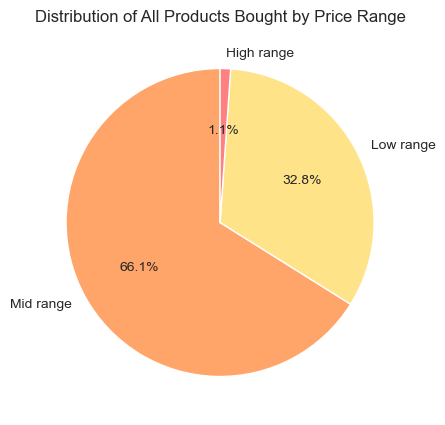

In [391]:
# rename ranges - shorten and fix inconsistency
label_mapping = {
    'Mid-range product': 'Mid range',
    'Low-range product': 'Low range',
    'High-range': 'High range'
}

# ---- CREATE CHART --------------------

# create pie chart
plt.figure(figsize=(5, 5))
dist_price_range_pie = plt.pie(price_range_counts, labels=price_range_counts.index.map(label_mapping), autopct='%1.1f%%', startangle=90, colors=[orange, yellow, red])

# ---- LABELS --------------------

# title
plt.title('Distribution of All Products Bought by Price Range')

# ---- EXPORT --------------------

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dist_price_range_pie.png'))

**Daily Price Range Distribution**

In [393]:
count_range_by_day = df.groupby(['price_range', 'order_day_of_week']).size().reset_index(name='item_count')
count_range_by_day.head(3)

,price_range,order_day_of_week,item_count
0,High-range,0,82620
1,High-range,1,65909
2,High-range,2,48218


In [395]:
pivot_data = count_range_by_day.pivot(index='order_day_of_week', columns='price_range', values='item_count').fillna(0)
pivot_data.head(3)

price_range,High-range,Low-range product,Mid-range product
order_day_of_week,,,
0,82620,1806754,4018435
1,65909,1704208,3640687
2,48218,1269662,2706132


<Figure size 1200x1000 with 0 Axes>

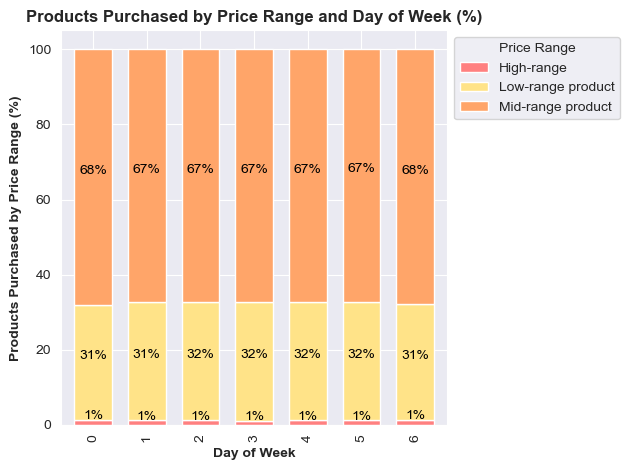

In [455]:
# ---- PREP DF --------------------

# store count of each price range by day
count_range_by_day = df.groupby(['price_range', 'order_day_of_week']).size().reset_index(name='item_count')

# pivot data so price ranges are now columns and the rows are their counts per dow
pivot_data = count_range_by_day.pivot(index='order_day_of_week', columns='price_range', values='item_count').fillna(0)

# normalize data (convert counts to percentages for each day)
pivot_data_percent = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# ---- CREATE CHART --------------------

# set size
plt.figure(figsize=(12, 10))

# create 100% stacked bar chart
normalized_daily_ranges_stackedbar = pivot_data_percent.plot(kind='bar', stacked=True, width=0.7, color=[red, yellow, orange])

# ---- LABELS --------------------

# percentage labels - iterate over each bar and each segment within the bar
for i, (row_name, row_data) in enumerate(pivot_data_percent.iterrows()):
    cumulative_height = 0  # keeps track of the cumulative height for the stacked bar
    for col_name, value in row_data.items():
        percentage = round(value) # calculate the percentage
        normalized_daily_ranges_stackedbar.text(i, cumulative_height + value / 2, f'{percentage}%', ha='center', va='bottom', color='black') # place the label in middle of bar
        cumulative_height += value # update the cumulative height for the next segment

# axis labels and title
plt.xlabel('Day of Week', fontweight='bold')
plt.ylabel('Products Purchased by Price Range (%)', fontweight='bold')
plt.title('Products Purchased by Price Range and Day of Week (%)', fontweight='bold')

# name legend and move outside chart
plt.legend(title='Price Range', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

**Price Range Distribution (Unique Product Names)**

In [ ]:
# drop duplicates based on 'product_name' to only look at unique product names
unique_products = df.drop_duplicates(subset='product_name')

# group by 'price_range' and count the unique product names
un_price_range_counts = unique_products['price_range'].value_counts(dropna=False)
un_price_range_counts

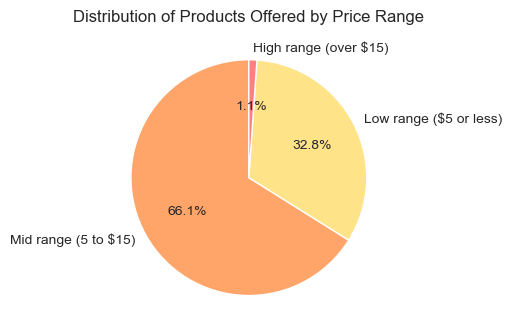

In [493]:
# rename ranges - shorten and fix inconsistency
label_mapping = {
    'Mid-range product': 'Mid range (5 to $15)',
    'Low-range product': 'Low range ($5 or less)',
    'High-range': 'High range (over $15)'
}

# ---- CREATE CHART --------------------

# create pie chart
plt.figure(figsize=(5, 5))
dist_price_range_pie = plt.pie(un_price_range_counts, labels=un_price_range_counts.index.map(label_mapping), autopct='%1.1f%%', startangle=90, colors=[orange, yellow, red])

# ---- LABELS --------------------

# title
plt.title('Distribution of Products Offered by Price Range')

# ---- EXPORT --------------------

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'un_dist_price_range_pie.png'))

### Key Question 4 - DEPARTMENT POPULARITY --------------------------------

In [ ]:
# store the number of times each department_id appears i.e. the number of times a product from that dep was bought
purchases_by_dep = df['department_id'].value_counts(dropna = False).sort_values(ascending = True).reset_index()
purchases_by_dep.columns = ['department_id', 'num_purchases']
purchases_by_dep

In [ ]:
# find the average price of each dep
avg_price_of_dep = df.groupby('department_id').agg({'prices':['mean']})
avg_price_of_dep.columns = ['mean']

# add flag that indicates if dep is a low, mid, or high product
def price_range_label(row):
    if row['mean'] <= 5:
        return 'LOW'
    elif (row['mean'] > 5) and (row['mean'] <= 15):
        return 'Mid-range product'
    elif row ['mean'] > 15:
        return 'HIGH'
    else: return 'Not enough data'

avg_price_of_dep['price_range'] = avg_price_of_dep.apply(price_range_label, axis = 1)
avg_price_of_dep

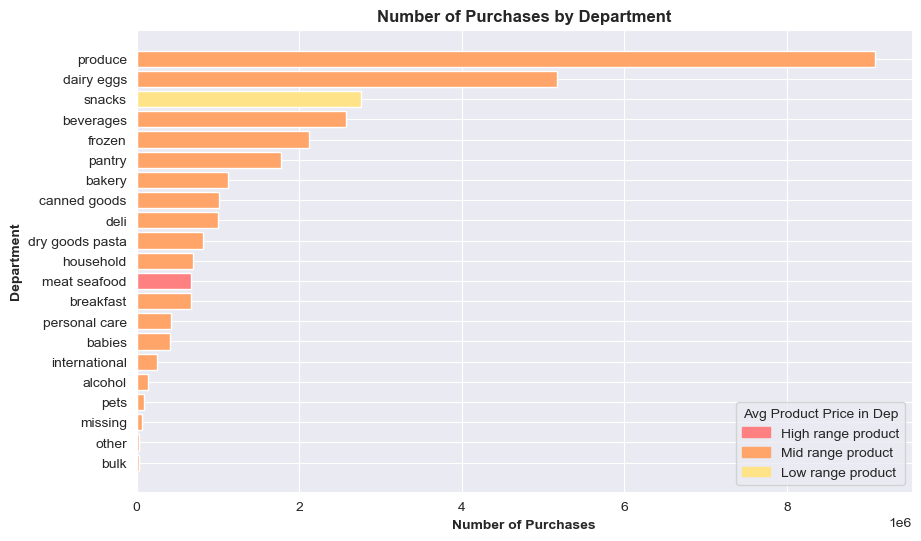

In [275]:
# ---- CATEGORIZE --------------------

# create color and text labels based on price range flag of dep
colors = []
labels = []
for purchase in purchases_by_dep_sorted['num_purchases']:
    if purchase == 674781: # dep 12 meat seafood
        colors.append(red) 
        labels.append('High range product')
    elif purchase == 2766406: # dep 19 snacks
        colors.append(yellow) 
        labels.append('Low range product')
    else:
        colors.append(orange)
        labels.append('Mid range product')

# ---- CREATE CHART --------------------

# set size
plt.figure(figsize=(10, 6)) 

# create horizontal bar chart
purchases_by_dep_barhchart = plt.barh(purchases_by_dep.index, purchases_by_dep['num_purchases'], color= colors)

# ---- LABELS --------------------

# set y-axis tick marks - assign labels to dep names
dep = ['bulk', 'other', 'missing', 'pets', 'alcohol', 'international', 'babies', 'personal care', 'breakfast', 'meat seafood', 'household', 'dry goods pasta', 'deli', 'canned goods', 'bakery', 'pantry', 'frozen', 'beverages', 'snacks', 'dairy eggs', 'produce']
plt.yticks(ticks=purchases_by_dep.index, labels=dep)

# legend
# create patches for each category
high_patch = mpatches.Patch(color=red, label='High range product')
medium_patch = mpatches.Patch(color=orange, label='Mid range product')
low_patch = mpatches.Patch(color=yellow, label='Low range product')
# create legend
plt.legend(handles=[high_patch, medium_patch, low_patch], title='Avg Product Price in Dep')

# add axis labels and title
plt.xlabel('Number of Purchases', fontweight='bold')
plt.ylabel('Department', fontweight='bold')
plt.title('Number of Purchases by Department', fontweight='bold')

# ---- EXPORT --------------------

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'purchases_by_dep_barhchart.png'))

### Key Question 5 - CUSTOMER PROFILES--------------------------------

#### 5a

**Brand Loyalty Distribution**

In [ ]:
loyalty_counts = df['loyalty_flag'].value_counts(dropna=False)
loyalty_counts

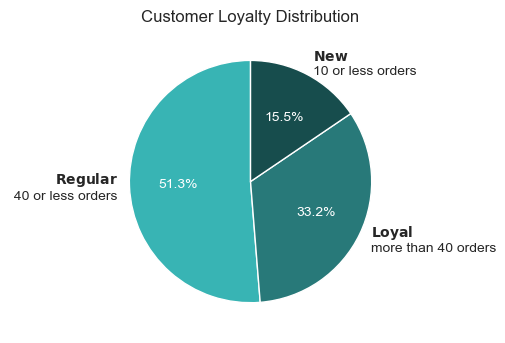

In [356]:
# rename ranges - shorten and fix inconsistency
label_mapping = {
    'Loyal customer': r'$\bf{Loyal}$' '\nmore than 40 orders',
    'Regular customer': r'$\bf{Regular}$' '\n 40 or less orders',
    'New customer': r'$\bf{New}$' '\n10 or less orders'
}

# ---- CREATE CHART --------------------

# create pie chart
plt.figure(figsize=(5, 5))
loyalty_dist_pie = plt.pie(loyalty_counts, labels=loyalty_counts.index.map(label_mapping), autopct='%1.1f%%', startangle=90, colors=[light_teal, teal, dark_teal])

# ---- LABELS --------------------

# set the percnt labels to white
for text in loyalty_dist_pie[2]: 
    text.set_color('white') 
    
# title
plt.title('Customer Loyalty Distribution')

# ---- EXPORT --------------------

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'un_dist_price_range_pie.png'))

#### 5b

**Ordering habits by loyalty status**

In [589]:
df.head(1)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,day_busyness,busiest_days,hour_of_day_busyness,...,med_days_since_prior_order,frequency_label,gender,state,age,date_joined,dependents,fam_status,income,region,age_group,income_group,dependents_flag,items_in_order,item_quantity_flag,order_total,order_spending_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,south,adult,lower class,Has dependents,5,Low product quantity,31.6,Low order total


- **spending (item)**: spending_flag *is the avg amount spent per item higher or lower than 10*
- **spending (order)**: spending_order_flag *is the avg amount spent per order lower than 50, 50 - 150, or over 150*
- **frequency**: frequency_label *do they return every 10 days or less, every 11 - 20 days, or over 20 days*
- **item quantity**: items_per_order *is the amount of product bought per order less than 10, 10-20, or over 20*
- **day**: busiest_days *when do they shop; during the top 2 busiest days, bottom 2, or other*

- SPENDING (PER ITEM)

In [ ]:
item_price_loyalty = df.groupby(['loyalty_flag', 'spending_flag']).size().reset_index(name='item_count')
item_pivot_data = item_price_loyalty.pivot(index='loyalty_flag', columns='spending_flag', values='item_count').fillna(0)
item_pivot_data

In [454]:
# calculate row totals
row_totals = item_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
item_pivot_data_percentage = item_pivot_data.div(row_totals, axis=0) * 100

item_pivot_data_percentage.round(2)

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,0.14,99.86
New customer,0.76,99.24
Regular customer,0.30,99.70


**INSIGHT**: It has already been established that a significant majority of items fall within the mid price range, which is lower than 10 (high spender). Because of this, it would be expected that all loyalties fall within low spender.

*the above findings will not be included in report due to redundancy*

- SPENDING (PER ORDER)

In [ ]:
df['order_total'] = df.groupby(['user_id', 'order_number'])['prices'].transform('sum')

In [425]:
df['order_total'].mean()

122.23033654054704

In [427]:
def order_total_label(row):
    if row['order_total'] < 50:
        return 'Low order total'
    elif (row['order_total'] >= 50) and (row['order_total'] <= 150):
        return 'Medium order total'
    elif row ['order_total'] > 150:
        return 'High order total'
    else: return 'Not enough data'
df['order_spending_flag'] = df.apply(order_total_label, axis = 1)
df['order_spending_flag'].value_counts(dropna = False)

order_spending_flag
Medium order total    17254268
High order total       9122473
Low order total        4582946
Name: count, dtype: int64

In [ ]:
order_total_loyalty = df.groupby(['loyalty_flag', 'order_spending_flag']).size().reset_index(name='item_count')
order_pivot_data = order_total_loyalty.pivot(index='loyalty_flag', columns='order_spending_flag', values='item_count').fillna(0)
order_pivot_data

In [ ]:
# calculate row totals
row_totals = order_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
order_pivot_data_percentage = order_pivot_data.div(row_totals, axis=0) * 100

order_pivot_data_percentage.round()

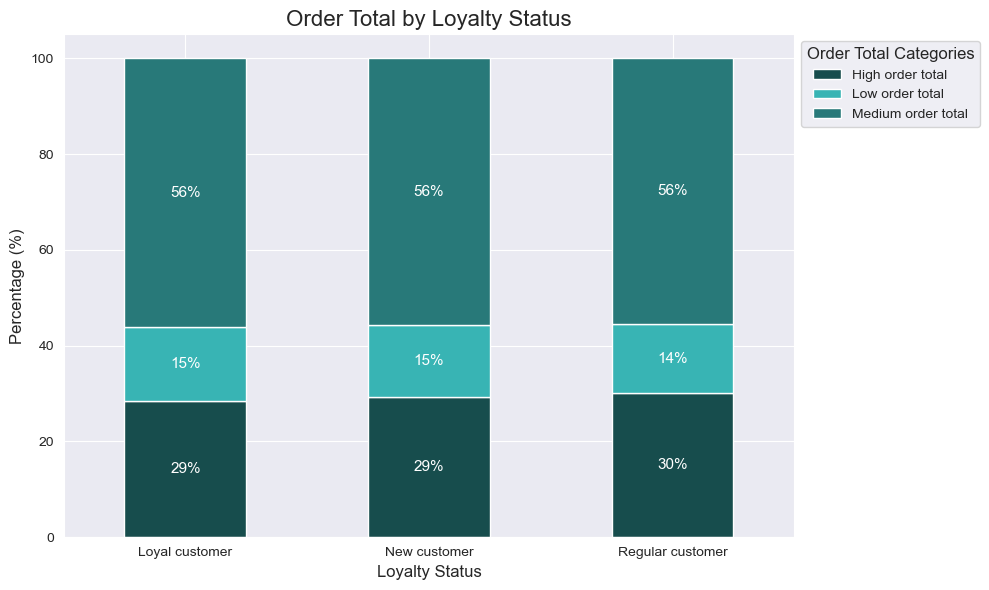

In [523]:
# ---- CREATE CHART --------------------

# create bar chart
order_total_loyalties_stackedbar = order_pivot_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal, light_teal, teal])

# ---- LABELS --------------------

# title and axis labels
plt.title('Order Total by Loyalty Status', fontsize=16)
plt.xlabel('Loyalty Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in order_total_loyalties_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    order_total_loyalties_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='white')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Order Total Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- FREQUENCEY

In [ ]:
freq_of_loyalty= df.groupby(['loyalty_flag', 'frequency_label']).size().reset_index(name='item_count')
freq_pivot_data = freq_of_loyalty.pivot(index='loyalty_flag', columns='frequency_label', values='item_count').fillna(0)
freq_pivot_data

In [ ]:
# calculate row totals
row_totals = freq_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
freq_pivot_data_percentage = freq_pivot_data.div(row_totals, axis=0) * 100

freq_pivot_data_percentage.round(2)

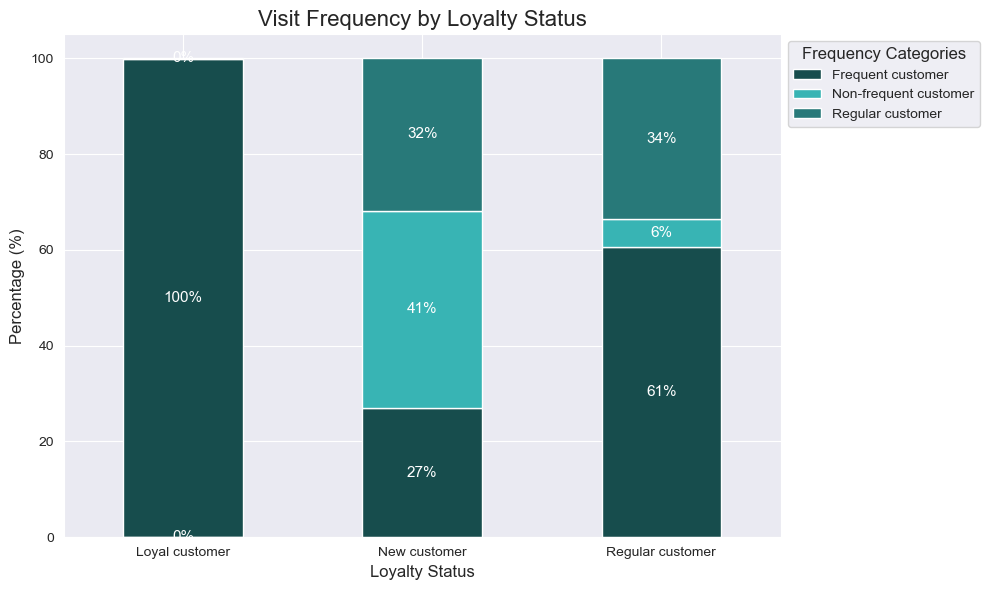

In [521]:
# ---- CREATE CHART --------------------

# create bar chart
frequency_loyalties_stackedbar = freq_pivot_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal, light_teal, teal])

# ---- LABELS --------------------

# title and axis labels
plt.title('Visit Frequency by Loyalty Status', fontsize=16)
plt.xlabel('Loyalty Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in frequency_loyalties_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    frequency_loyalties_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='white')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Frequency Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- PRODUCT QUANTITY PER ORDER

In [ ]:
df['items_in_order'] = df.groupby(['user_id', 'order_number'])['product_name'].transform('size')
def quantity_label(row):
    if row['items_in_order'] < 10:
        return 'Low product quantity'
    elif (row['items_in_order'] >= 10) and (row['items_in_order'] <= 20):
        return 'Medium product quantity'
    elif row ['items_in_order'] > 20:
        return 'High product quantity'
    else: return 'Not enough data'
df['item_quantity_flag'] = df.apply(quantity_label, axis = 1)
df['item_quantity_flag'].value_counts(dropna = False)

In [ ]:
item_quantity_loyalty = df.groupby(['loyalty_flag', 'item_quantity_flag']).size().reset_index(name='item_count')
quantity_pivot_data = item_quantity_loyalty.pivot(index='loyalty_flag', columns='item_quantity_flag', values='item_count').fillna(0)
quantity_pivot_data

In [ ]:
# calculate row totals
row_totals = quantity_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
quantity_pivot_data_percentage = quantity_pivot_data.div(row_totals, axis=0) * 100

quantity_pivot_data_percentage.round(2)

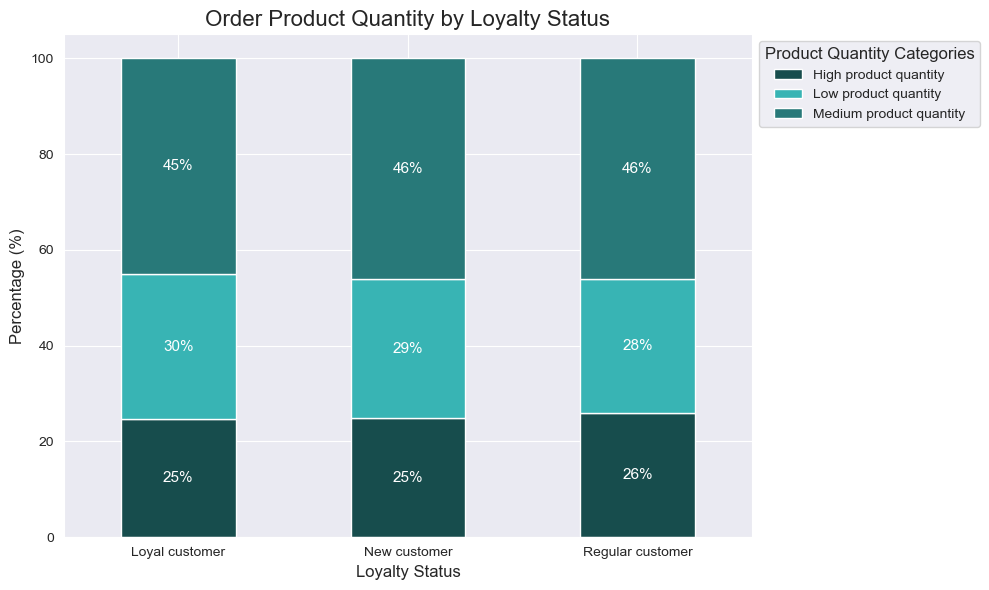

In [529]:
# ---- CREATE CHART --------------------

# create bar chart
item_quantity_loyalties_stackedbar = quantity_pivot_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal, light_teal, teal])

# ---- LABELS --------------------

# title and axis labels
plt.title('Order Product Quantity by Loyalty Status', fontsize=16)
plt.xlabel('Loyalty Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in item_quantity_loyalties_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    item_quantity_loyalties_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='white')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Product Quantity Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- DAY

In [ ]:
day_loyalty = df.groupby(['loyalty_flag', 'busiest_days']).size().reset_index(name='item_count')
day_pivot_data = day_loyalty.pivot(index='loyalty_flag', columns='busiest_days', values='item_count').fillna(0)
day_pivot_data

In [ ]:
# calculate row totals
row_totals = day_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
day_pivot_data_percentage = day_pivot_data.div(row_totals, axis=0) * 100

day_pivot_data_percentage.round(2)

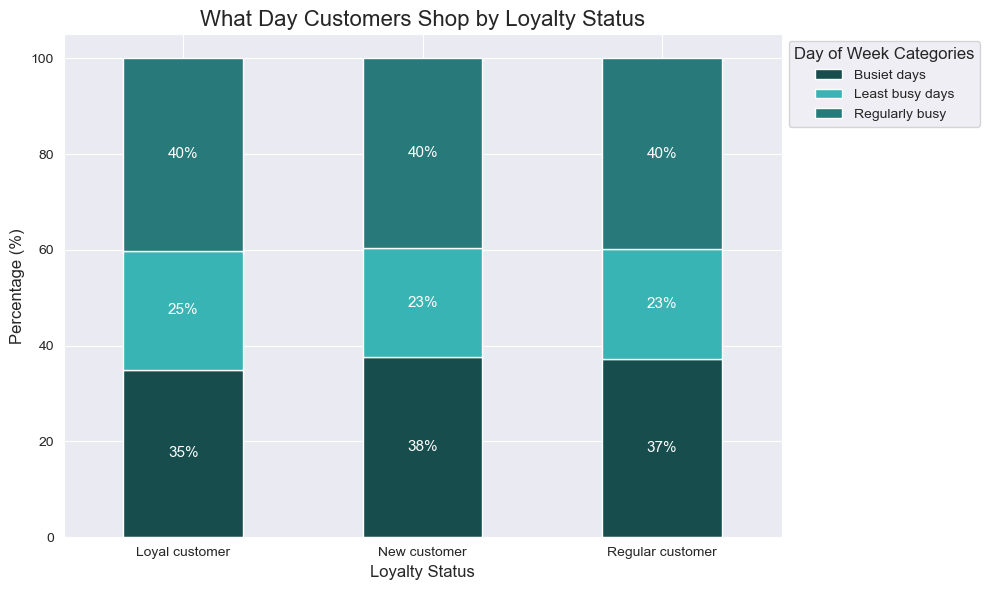

In [598]:
# ---- CREATE CHART --------------------

# create bar chart
day_loyalties_stackedbar = day_pivot_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal, light_teal, teal])

# ---- LABELS --------------------

# title and axis labels
plt.title('What Day Customers Shop by Loyalty Status', fontsize=16)
plt.xlabel('Loyalty Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in day_loyalties_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    day_loyalties_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='white')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Day of Week Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- HOUR

In [ ]:
hour_loyalty = df.groupby(['loyalty_flag', 'hour_of_day_busyness']).size().reset_index(name='item_count')
hour_pivot_data = hour_loyalty.pivot(index='loyalty_flag', columns='hour_of_day_busyness', values='item_count').fillna(0)
hour_pivot_data

In [ ]:
# calculate row totals
row_totals = hour_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
hour_pivot_data_percentage = hour_pivot_data.div(row_totals, axis=0) * 100

hour_pivot_data_percentage.round(2)

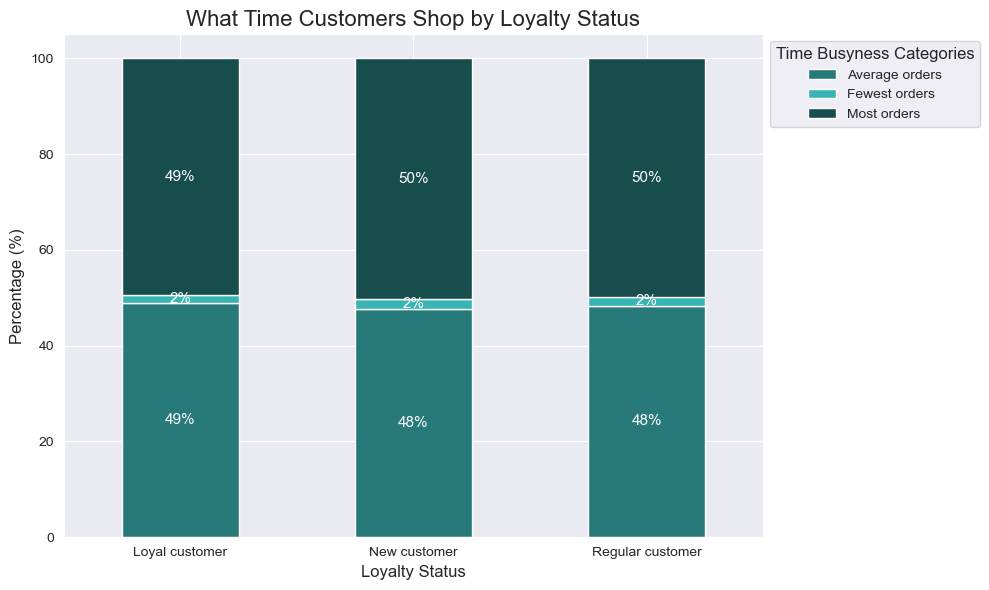

In [816]:
# ---- CREATE CHART --------------------

# create bar chart
hour_loyalties_stackedbar = hour_pivot_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[teal, light_teal, dark_teal])

# ---- LABELS --------------------

# title and axis labels
plt.title('What Time Customers Shop by Loyalty Status', fontsize=16)
plt.xlabel('Loyalty Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in hour_loyalties_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    hour_loyalties_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='white')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Time Busyness Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

#### 5c

**Ordering Habits by Region**

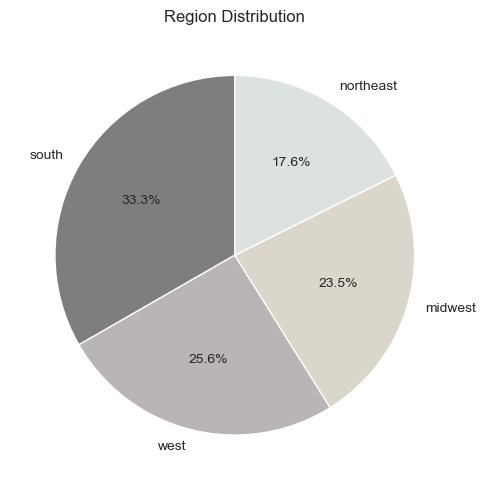

In [697]:
# Region Distribution
orders_counts = df['region'].value_counts(dropna=False)

# ---- CREATE CHART --------------------

# create pie chart
plt.figure(figsize=(5, 5))
region_dist_pie = plt.pie(orders_counts, labels=orders_counts.index, autopct='%1.1f%%', startangle=90, colors=['#7f7e7e', '#b9b5b5', '#dad6cb', '#dce2e0'])

# ---- LABELS -------------------- 
    
# title
plt.title('Region Distribution')

# ---- EXPORT --------------------

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_dist_pie.png'))

- spending per order
- visit frequency
- item quantity

- SPENDING PER ORDER

In [ ]:
spending_region = df.groupby(['region', 'order_spending_flag']).size().reset_index(name='item_count')
spending_region_pivot_data = spending_region.pivot(index='region', columns='order_spending_flag', values='item_count').fillna(0)
spending_region_pivot_data

In [ ]:
# calculate row totals
row_totals = spending_region_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
spending_region_percentage = spending_region_pivot_data.div(row_totals, axis=0) * 100

spending_region_percentage.round(2)

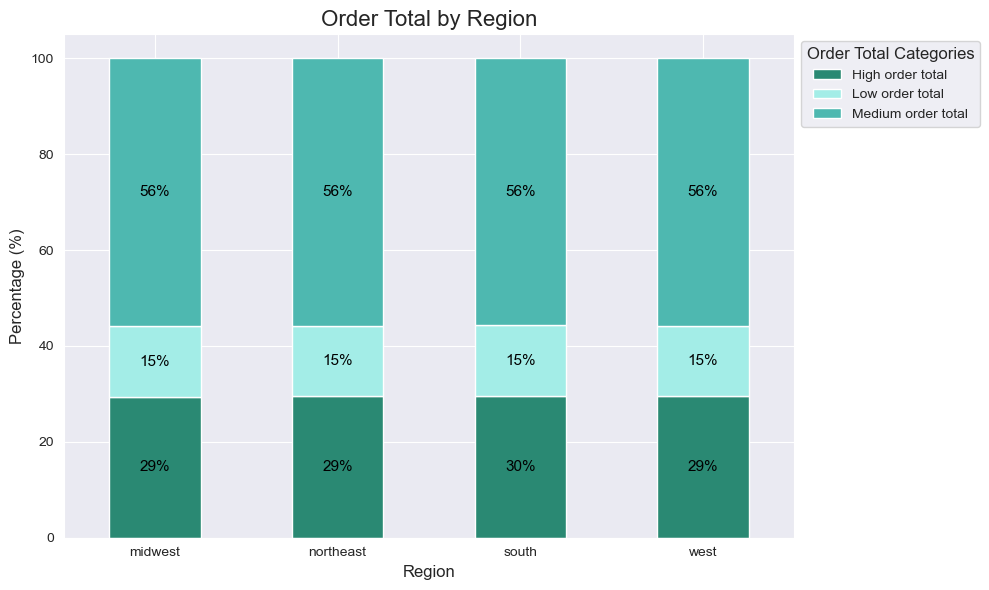

In [667]:
# ---- CREATE CHART --------------------

# create bar chart
spending_region_stackedbar = spending_region_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal2, light_teal2, teal2])

# ---- LABELS --------------------

# title and axis labels
plt.title('Order Total by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in spending_region_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    spending_region_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Order Total Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- FREQUENCY

In [ ]:
freq_region = df.groupby(['region', 'frequency_label']).size().reset_index(name='item_count')
freq_region_pivot_data = freq_region.pivot(index='region', columns='frequency_label', values='item_count').fillna(0)
freq_region_pivot_data

In [ ]:
# calculate row totals
row_totals = freq_region_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
freq_region_percentage = freq_region_pivot_data.div(row_totals, axis=0) * 100

freq_region_percentage.round(2)

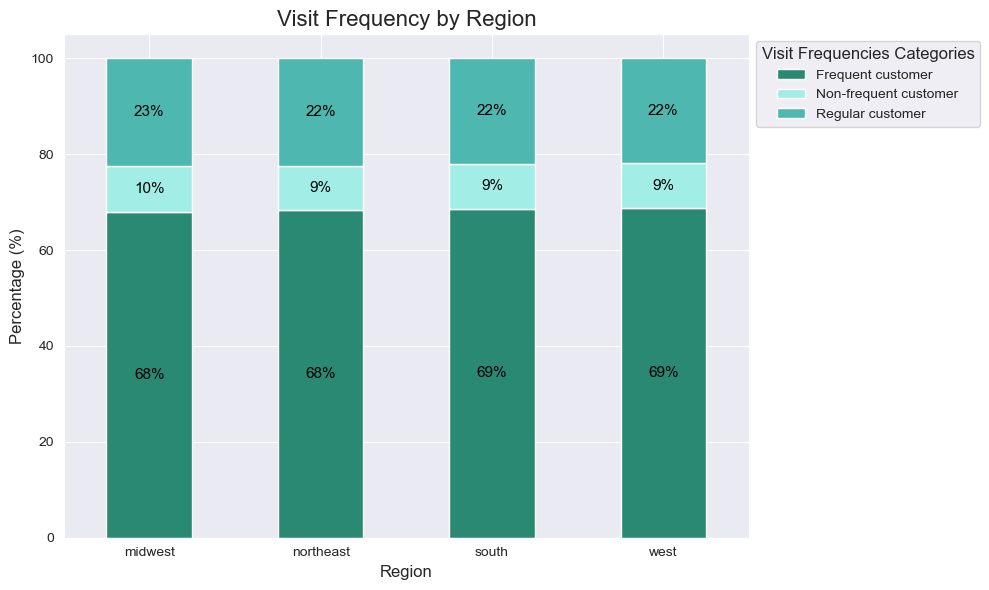

In [669]:
# ---- CREATE CHART --------------------

# create bar chart
freq_region_stackedbar = freq_region_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal2, light_teal2, teal2])

# ---- LABELS --------------------

# title and axis labels
plt.title('Visit Frequency by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in freq_region_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    freq_region_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Visit Frequencies Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- ITEM QUANTITY

In [ ]:
item_quantity_region = df.groupby(['region', 'item_quantity_flag']).size().reset_index(name='item_count')
quantity_region_pivot_data = item_quantity_region.pivot(index='region', columns='item_quantity_flag', values='item_count').fillna(0)
quantity_region_pivot_data

In [ ]:
# calculate row totals
row_totals = quantity_region_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
region_quantity_percentage = quantity_region_pivot_data.div(row_totals, axis=0) * 100

region_quantity_percentage.round(2)

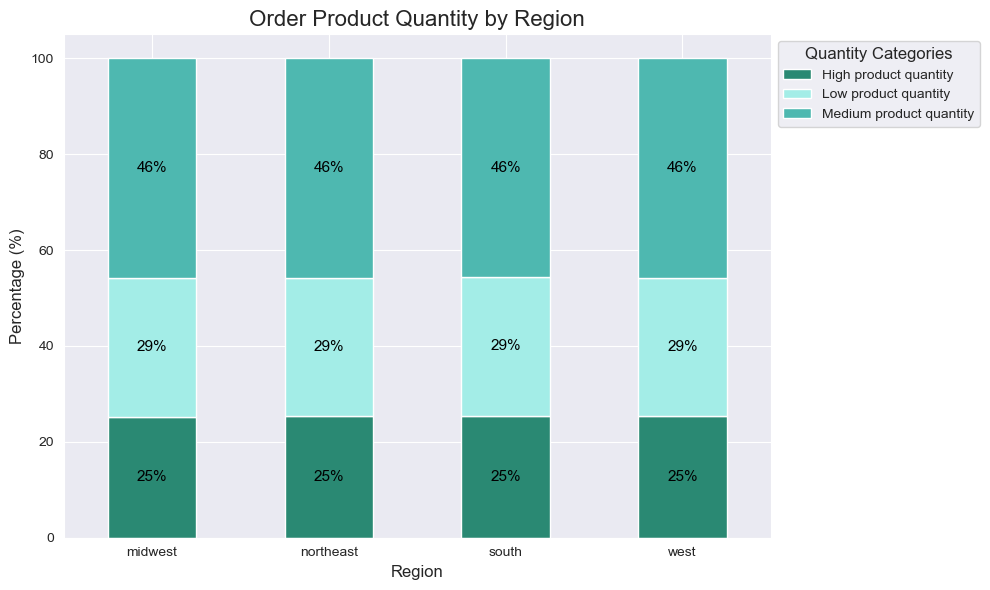

In [671]:
# ---- CREATE CHART --------------------

# create bar chart
quantity_region_stackedbar = region_quantity_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal2, light_teal2, teal2])

# ---- LABELS --------------------

# title and axis labels
plt.title('Order Product Quantity by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in quantity_region_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    quantity_region_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Quantity Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- DAY

In [ ]:
day_region = df.groupby(['region', 'busiest_days']).size().reset_index(name='item_count')
day_region_pivot_data = day_region.pivot(index='region', columns='busiest_days', values='item_count').fillna(0)
day_region_pivot_data

In [ ]:
# calculate row totals
row_totals = day_region_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
region_day_percentage = day_region_pivot_data.div(row_totals, axis=0) * 100

region_day_percentage.round(2)

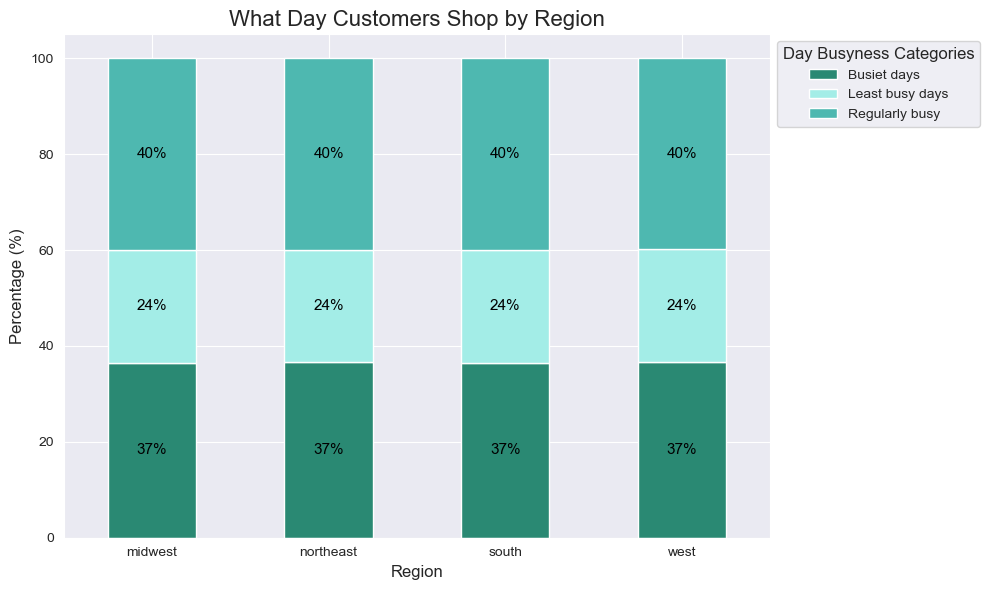

In [673]:
# ---- CREATE CHART --------------------

# create bar chart
day_region_stackedbar = region_day_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal2, light_teal2, teal2])

# ---- LABELS --------------------

# title and axis labels
plt.title('What Day Customers Shop by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in day_region_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    day_region_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Day Busyness Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- TIME

In [ ]:
time_region = df.groupby(['region', 'hour_of_day_busyness']).size().reset_index(name='item_count')
time_region_pivot_data = time_region.pivot(index='region', columns='hour_of_day_busyness', values='item_count').fillna(0)
time_region_pivot_data

In [625]:
# calculate row totals
row_totals = time_region_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
region_time_percentage = time_region_pivot_data.div(row_totals, axis=0) * 100

region_time_percentage.round(2)

hour_of_day_busyness,Average orders,Fewest orders,Most orders
region,,,
midwest,48.54,1.83,49.63
northeast,48.34,1.86,49.80
south,48.56,1.84,49.60
west,48.19,1.81,50.00


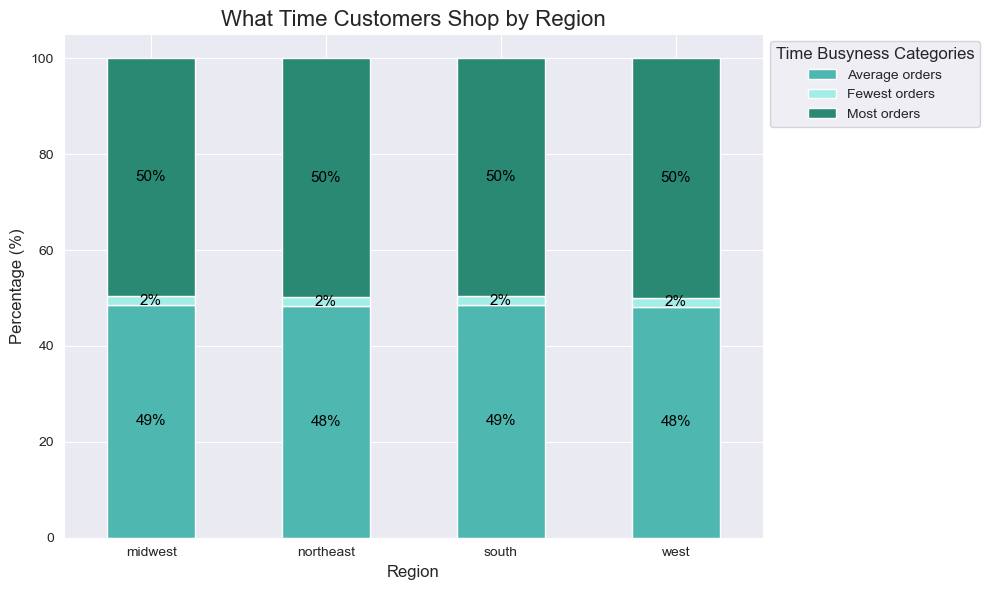

In [814]:
# ---- CREATE CHART --------------------

# create bar chart
time_region_stackedbar = region_time_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[teal2, light_teal2, dark_teal2])

# ---- LABELS --------------------

# title and axis labels
plt.title('What Time Customers Shop by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in time_region_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    time_region_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Time Busyness Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

#### 5d

**-- Age & Family Status Ordering Habits --**

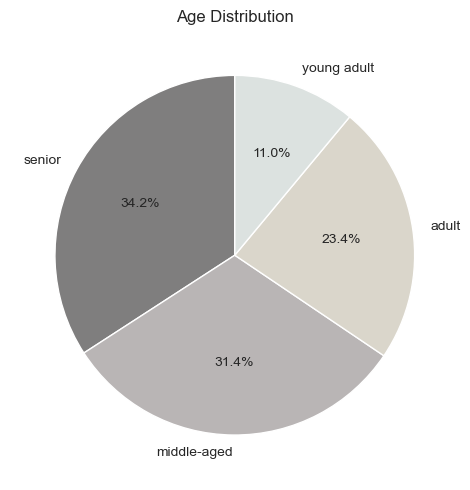

In [699]:
# Region Distribution
age_counts = df['age_group'].value_counts(dropna=False)

# ---- CREATE CHART --------------------

# create pie chart
plt.figure(figsize=(5, 5))
age_dist_pie = plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=['#7f7e7e', '#b9b5b5', '#dad6cb', '#dce2e0'])

# ---- LABELS -------------------- 
    
# title
plt.title('Age Distribution')

# ---- EXPORT --------------------

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dist_pie.png'))

- SPENDING

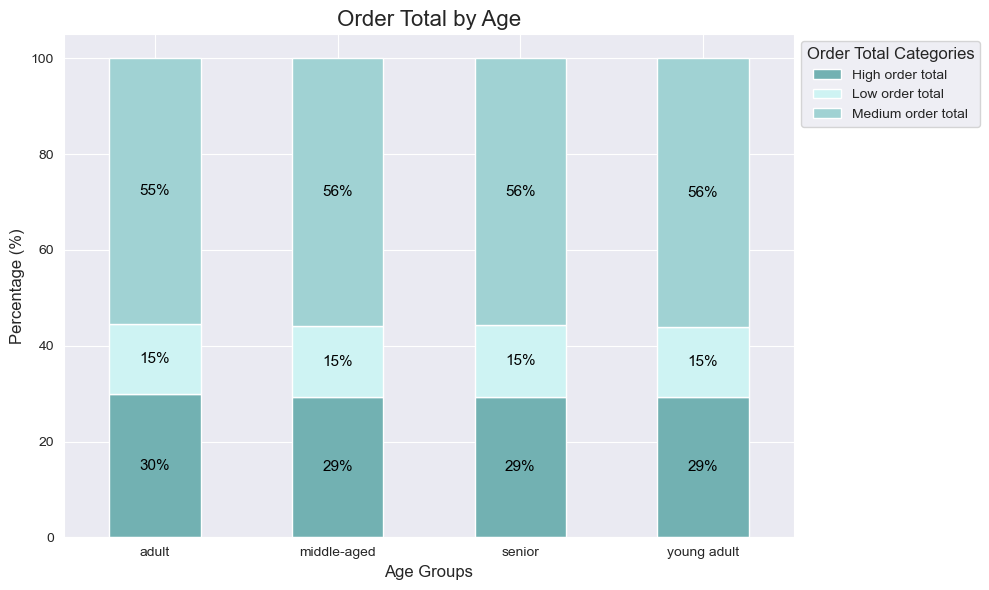

In [705]:
spending_age = df.groupby(['age_group', 'order_spending_flag']).size().reset_index(name='item_count')
spending_age_pivot_data = spending_age.pivot(index='age_group', columns='order_spending_flag', values='item_count').fillna(0)

# calculate row totals
row_totals = spending_age_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
spending_age_percentage = spending_age_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
spending_age_stackedbar = spending_age_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal3, light_teal3, teal3])

# ---- LABELS --------------------

# title and axis labels
plt.title('Order Total by Age', fontsize=16)
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in spending_age_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    spending_age_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Order Total Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- FREQUENCY

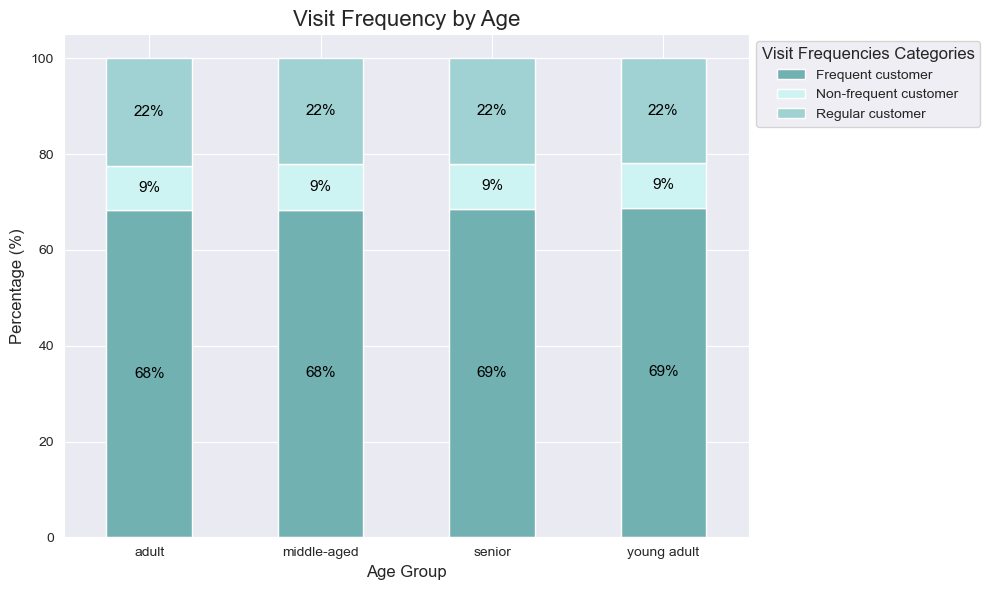

In [707]:
freq_age = df.groupby(['age_group', 'frequency_label']).size().reset_index(name='item_count')
freq_age_pivot_data = freq_age.pivot(index='age_group', columns='frequency_label', values='item_count').fillna(0)

row_totals = freq_age_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
freq_age_percentage = freq_age_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
freq_age_stackedbar = freq_age_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal3, light_teal3, teal3])

# ---- LABELS --------------------

# title and axis labels
plt.title('Visit Frequency by Age', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in freq_age_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    freq_age_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Visit Frequencies Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- ITEM QUANTITY

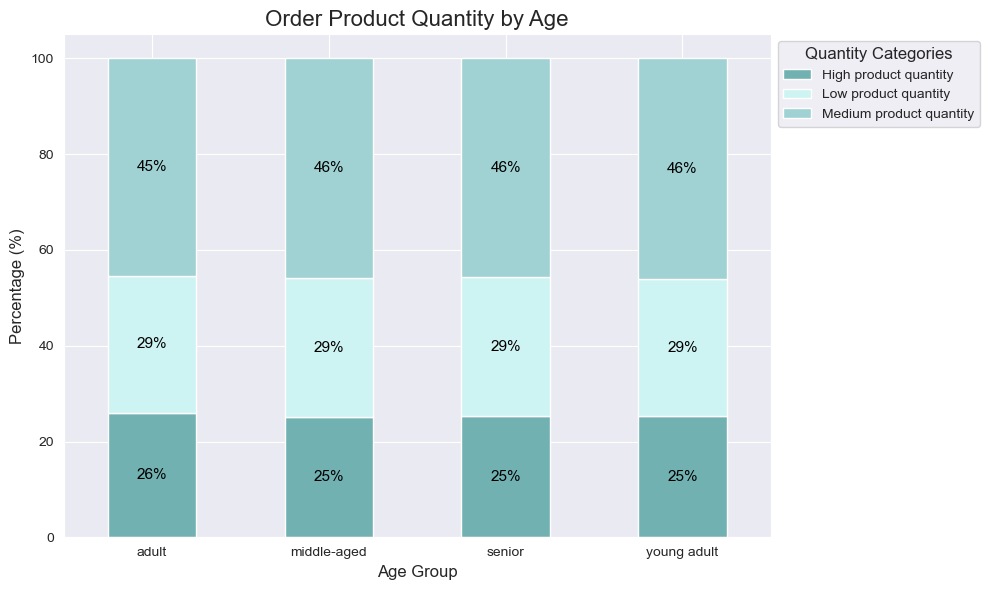

In [709]:
item_quantity_age = df.groupby(['age_group', 'item_quantity_flag']).size().reset_index(name='item_count')
quantity_age_pivot_data = item_quantity_age.pivot(index='age_group', columns='item_quantity_flag', values='item_count').fillna(0)

# calculate row totals
row_totals = quantity_age_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
quantity_pivot_data_percentage = quantity_age_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
quantity_age_stackedbar = quantity_pivot_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal3, light_teal3, teal3])

# ---- LABELS --------------------

# title and axis labels
plt.title('Order Product Quantity by Age', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in quantity_age_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    quantity_age_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Quantity Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- DAY

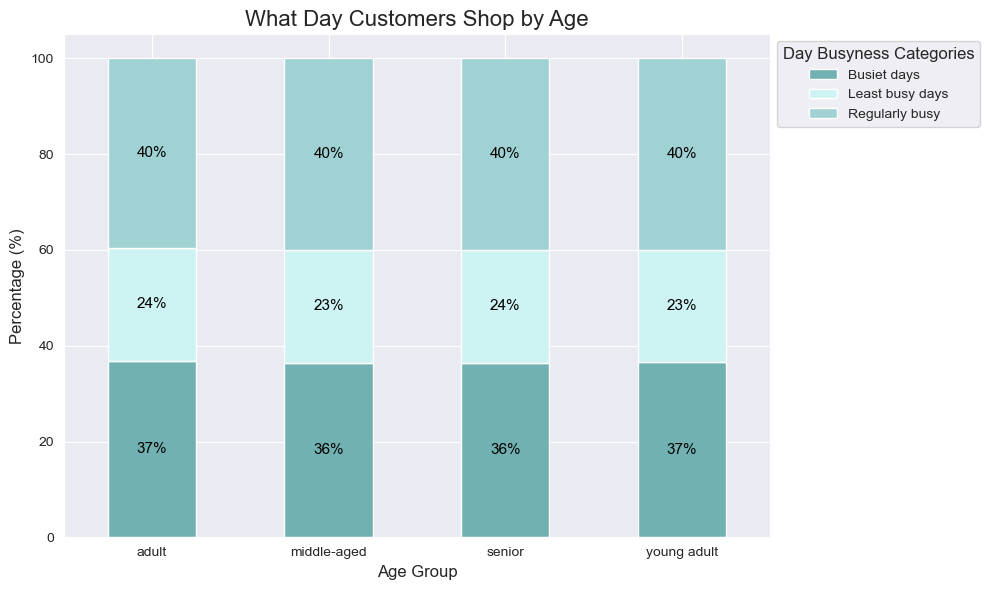

In [711]:
day_age = df.groupby(['age_group', 'busiest_days']).size().reset_index(name='item_count')
day_age_pivot_data = day_age.pivot(index='age_group', columns='busiest_days', values='item_count').fillna(0)

# calculate row totals
row_totals = day_age_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
age_day_percentage = day_age_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
day_age_stackedbar = age_day_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal3, light_teal3, teal3])

# ---- LABELS --------------------

# title and axis labels
plt.title('What Day Customers Shop by Age', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in day_age_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    day_age_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Day Busyness Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- TIME

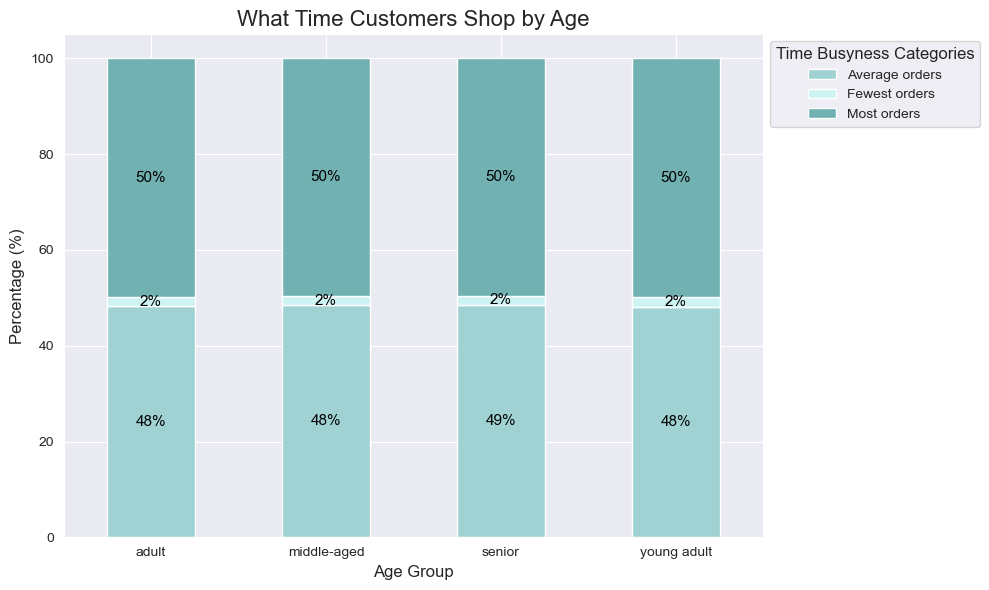

In [812]:
time_age = df.groupby(['age_group', 'hour_of_day_busyness']).size().reset_index(name='item_count')
time_age_pivot_data = time_age.pivot(index='age_group', columns='hour_of_day_busyness', values='item_count').fillna(0)

# calculate row totals
row_totals = time_age_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
age_time_percentage = time_age_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
time_age_stackedbar = age_time_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[teal3, light_teal3, dark_teal3])

# ---- LABELS --------------------

# title and axis labels
plt.title('What Time Customers Shop by Age', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in time_age_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    time_age_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Time Busyness Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

**-- Dependents --**

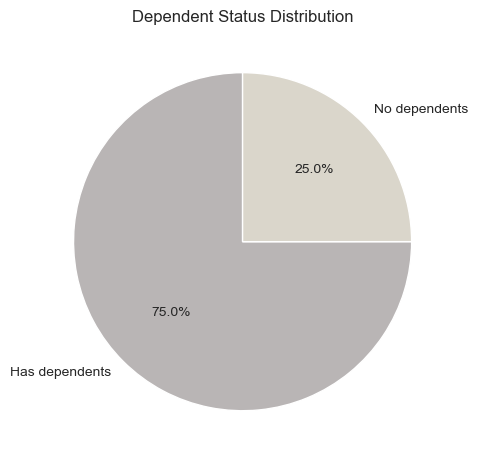

In [731]:
# Region Distribution
dependents_counts = df['dependents_flag'].value_counts(dropna=False)

# ---- CREATE CHART --------------------

# create pie chart
plt.figure(figsize=(5, 5))
dependents_dist_pie = plt.pie(dependents_counts, labels=dependents_counts.index, autopct='%1.1f%%', startangle=90, colors=['#b9b5b5', '#dad6cb'])

# ---- LABELS -------------------- 
    
# title
plt.title('Dependent Status Distribution')

# ---- EXPORT --------------------

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependents_dist_pie.png'))

- SPENDING

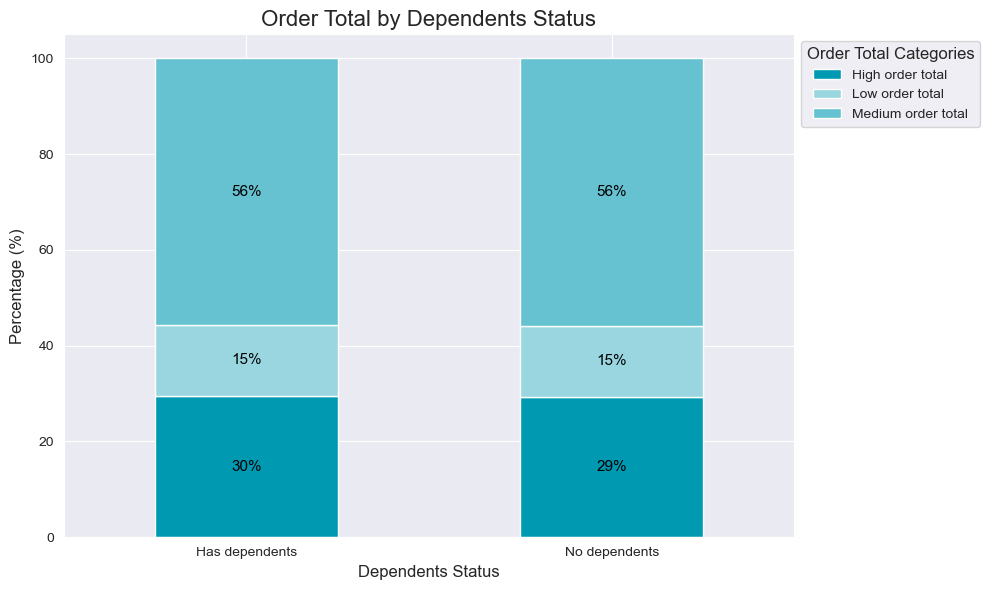

In [750]:
spending_dep = df.groupby(['dependents_flag', 'order_spending_flag']).size().reset_index(name='item_count')
spending_dep_pivot_data = spending_dep.pivot(index='dependents_flag', columns='order_spending_flag', values='item_count').fillna(0)

# calculate row totals
row_totals = spending_dep_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
spending_dep_percentage = spending_dep_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
spending_dep_stackedbar = spending_dep_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal4, light_teal4, teal4])

# ---- LABELS --------------------

# title and axis labels
plt.title('Order Total by Dependents Status', fontsize=16)
plt.xlabel('Dependents Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in spending_dep_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    spending_dep_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Order Total Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- FREQUENCY

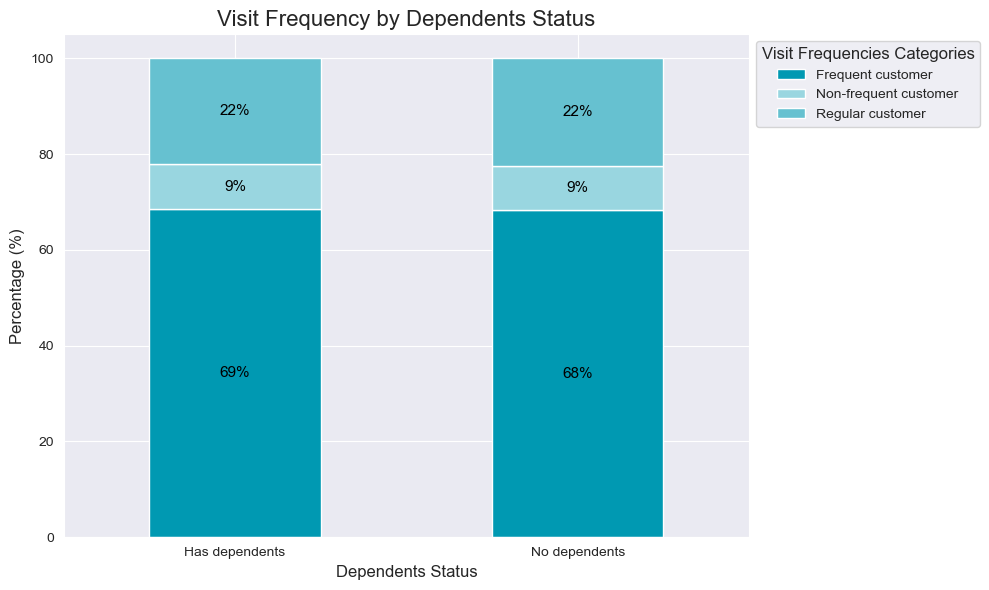

In [758]:
freq_dep = df.groupby(['dependents_flag', 'frequency_label']).size().reset_index(name='item_count')
freq_dep_pivot_data = freq_dep.pivot(index='dependents_flag', columns='frequency_label', values='item_count').fillna(0)

row_totals = freq_dep_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
freq_dep_percentage = freq_dep_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
freq_dep_stackedbar = freq_dep_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal4, light_teal4, teal4])

# ---- LABELS --------------------

# title and axis labels
plt.title('Visit Frequency by Dependents Status', fontsize=16)
plt.xlabel('Dependents Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in freq_dep_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    freq_dep_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Visit Frequencies Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- QUANTITY

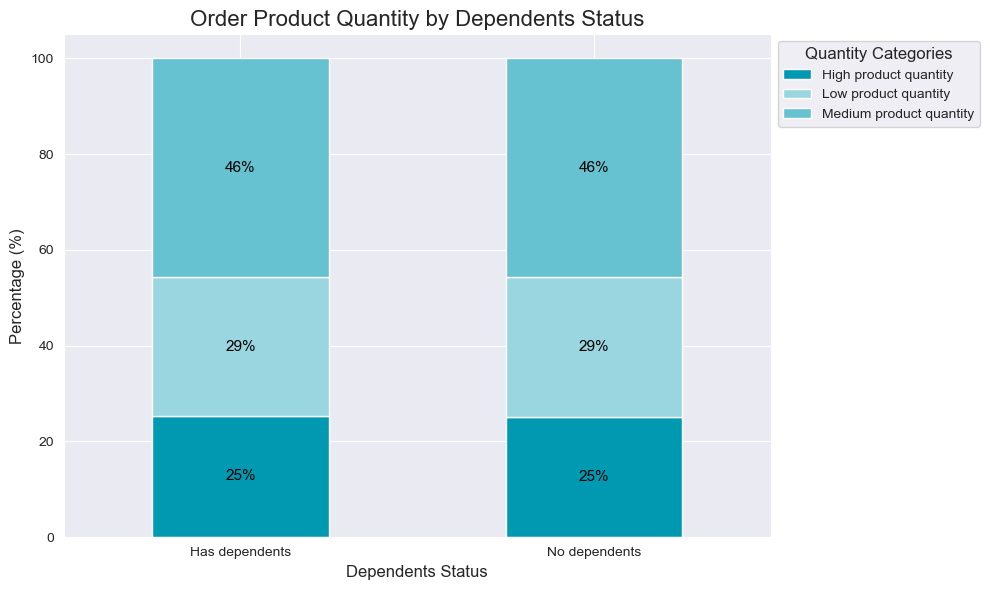

In [762]:
item_quantity_dep = df.groupby(['dependents_flag', 'item_quantity_flag']).size().reset_index(name='item_count')
quantity_dep_pivot_data = item_quantity_dep.pivot(index='dependents_flag', columns='item_quantity_flag', values='item_count').fillna(0)

# calculate row totals
row_totals = quantity_dep_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
quantity_pivot_data_percentage = quantity_dep_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
quantity_dep_stackedbar = quantity_pivot_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal4, light_teal4, teal4])

# ---- LABELS --------------------

# title and axis labels
plt.title('Order Product Quantity by Dependents Status', fontsize=16)
plt.xlabel('Dependents Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in quantity_dep_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    quantity_dep_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Quantity Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- DAY

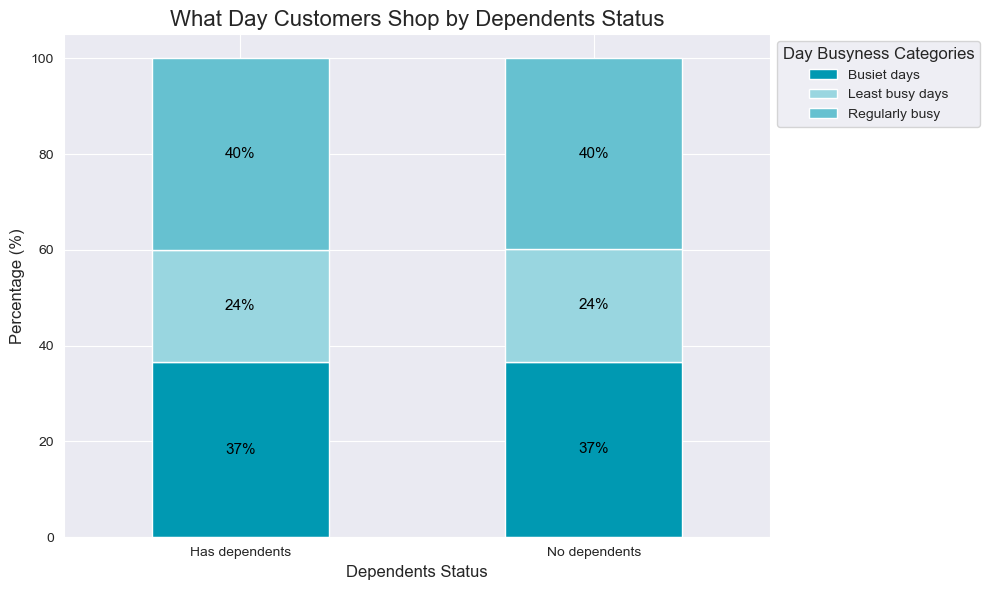

In [766]:
day_dep = df.groupby(['dependents_flag', 'busiest_days']).size().reset_index(name='item_count')
day_dep_pivot_data = day_dep.pivot(index='dependents_flag', columns='busiest_days', values='item_count').fillna(0)

# calculate row totals
row_totals = day_dep_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
dep_day_percentage = day_dep_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
day_dep_stackedbar = dep_day_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal4, light_teal4, teal4])

# ---- LABELS --------------------

# title and axis labels
plt.title('What Day Customers Shop by Dependents Status', fontsize=16)
plt.xlabel('Dependents Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in day_dep_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    day_dep_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Day Busyness Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- TIME

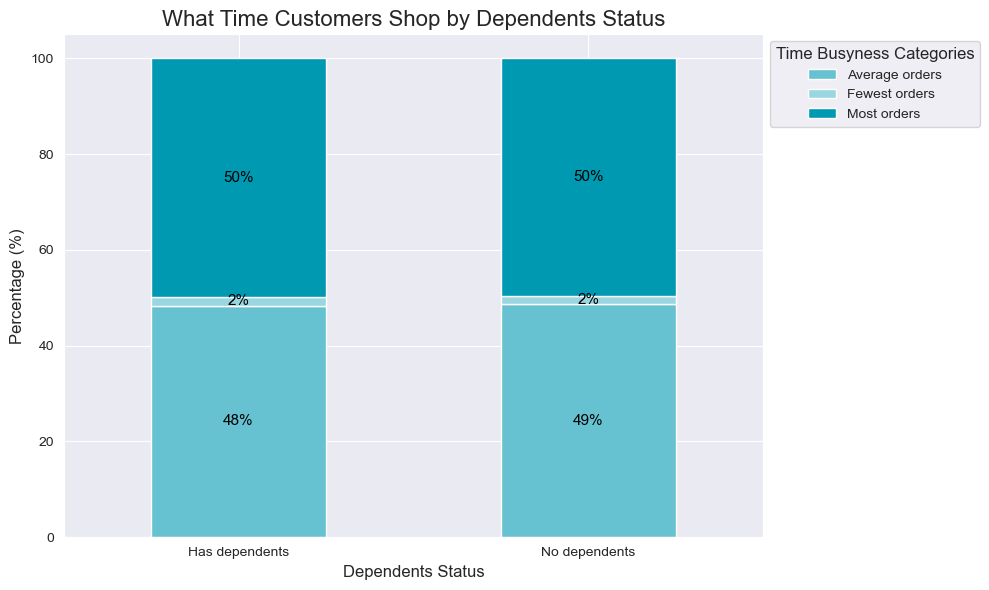

In [810]:
time_dep = df.groupby(['dependents_flag', 'hour_of_day_busyness']).size().reset_index(name='item_count')
time_dep_pivot_data = time_dep.pivot(index='dependents_flag', columns='hour_of_day_busyness', values='item_count').fillna(0)

# calculate row totals
row_totals = time_dep_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
dep_time_percentage = time_dep_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
time_dep_stackedbar = dep_time_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[teal4, light_teal4, dark_teal4])

# ---- LABELS --------------------

# title and axis labels
plt.title('What Time Customers Shop by Dependents Status', fontsize=16)
plt.xlabel('Dependents Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in time_dep_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    time_dep_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Time Busyness Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

#### 5e

**-- Income --**

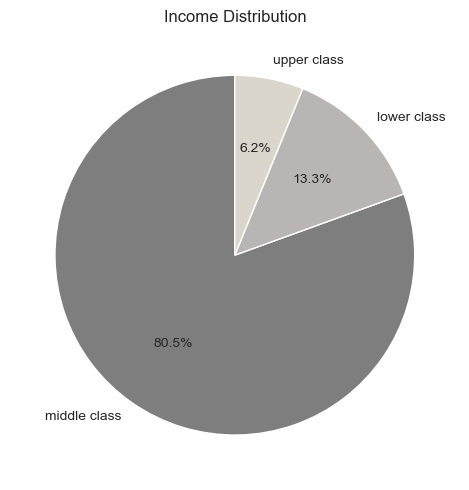

In [776]:
# Region Distribution
income_counts = df['income_group'].value_counts(dropna=False)

# ---- CREATE CHART --------------------

# create pie chart
plt.figure(figsize=(5, 5))
income_dist_pie = plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90, colors=['#7f7e7e', '#b9b5b5', '#dad6cb', '#dce2e0'])

# ---- LABELS -------------------- 
    
# title
plt.title('Income Distribution')

# ---- EXPORT --------------------

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_counts.png'))

- SPENDING

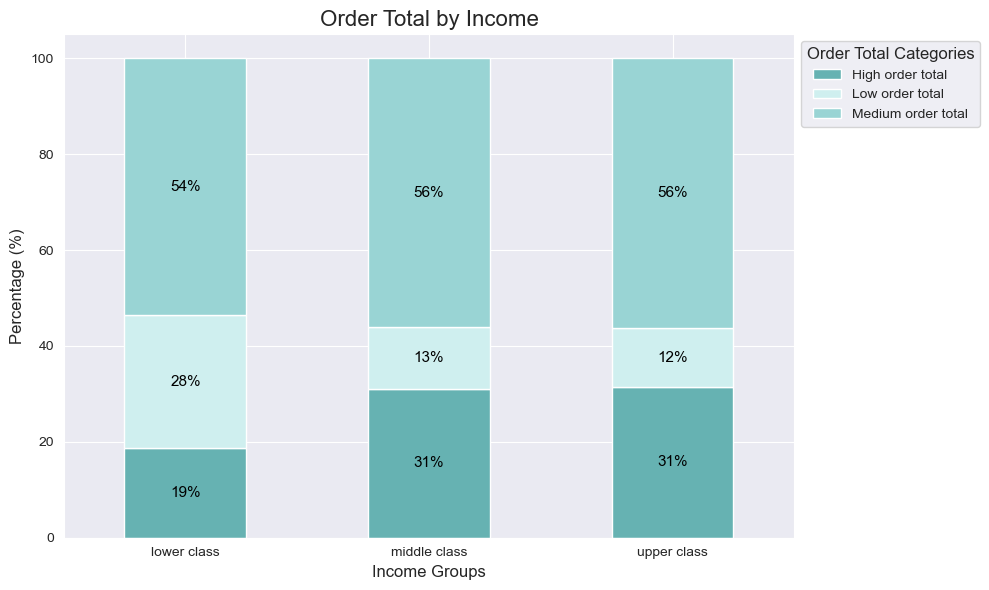

In [784]:
spending_income = df.groupby(['income_group', 'order_spending_flag']).size().reset_index(name='item_count')
spending_income_pivot_data = spending_income.pivot(index='income_group', columns='order_spending_flag', values='item_count').fillna(0)

# calculate row totals
row_totals = spending_income_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
spending_income_percentage = spending_income_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
spending_income_stackedbar = spending_income_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal5, light_teal5, teal5])

# ---- LABELS --------------------

# title and axis labels
plt.title('Order Total by Income', fontsize=16)
plt.xlabel('Income Groups', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in spending_income_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    spending_income_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Order Total Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- FREQUENCY

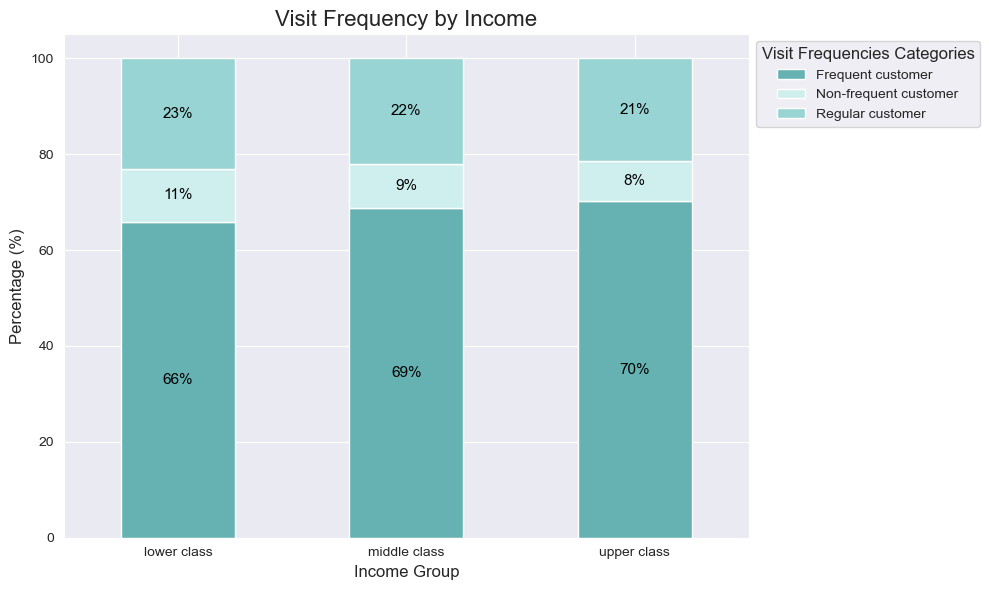

In [788]:
freq_income = df.groupby(['income_group', 'frequency_label']).size().reset_index(name='item_count')
freq_income_pivot_data = freq_income.pivot(index='income_group', columns='frequency_label', values='item_count').fillna(0)

row_totals = freq_income_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
freq_income_percentage = freq_income_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
freq_income_stackedbar = freq_income_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal5, light_teal5, teal5])

# ---- LABELS --------------------

# title and axis labels
plt.title('Visit Frequency by Income', fontsize=16)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in freq_income_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    freq_income_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Visit Frequencies Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- QUANTITY

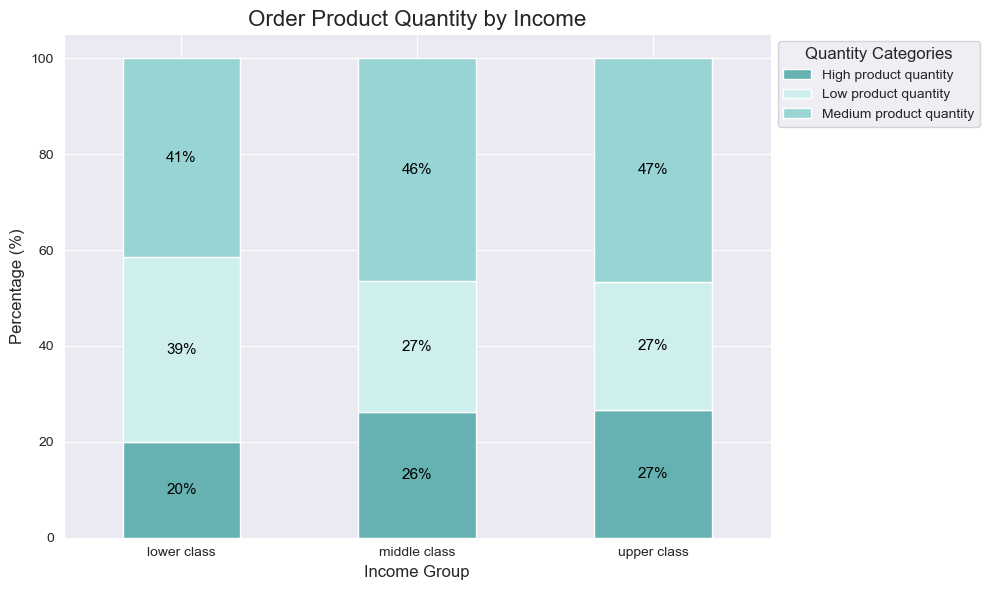

In [792]:
item_quantity_income = df.groupby(['income_group', 'item_quantity_flag']).size().reset_index(name='item_count')
quantity_income_pivot_data = item_quantity_income.pivot(index='income_group', columns='item_quantity_flag', values='item_count').fillna(0)

# calculate row totals
row_totals = quantity_income_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
quantity_pivot_data_percentage = quantity_income_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
quantity_income_stackedbar = quantity_pivot_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal5, light_teal5, teal5])

# ---- LABELS --------------------

# title and axis labels
plt.title('Order Product Quantity by Income', fontsize=16)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in quantity_income_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    quantity_income_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Quantity Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- DAY

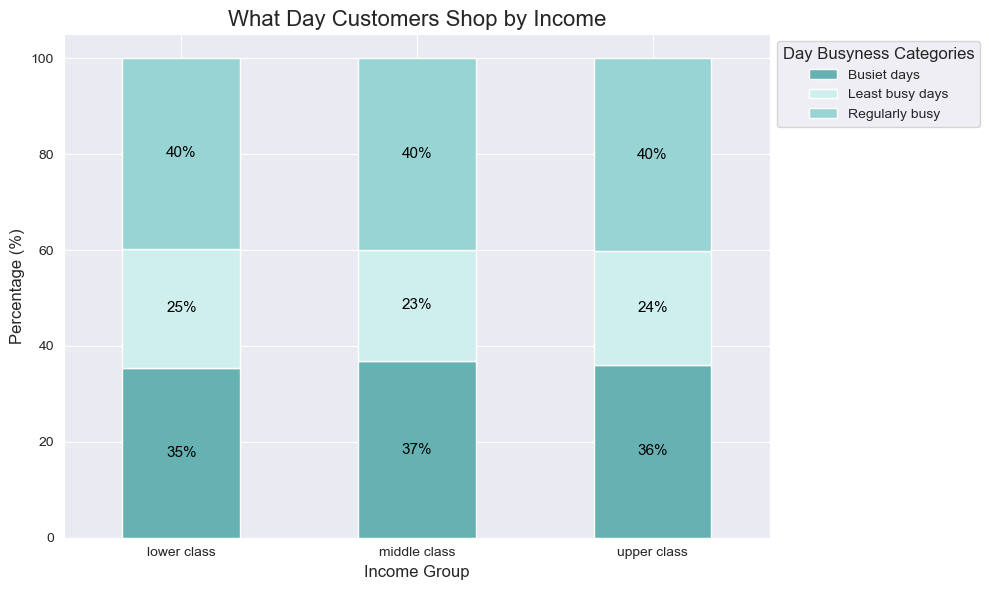

In [796]:
day_income = df.groupby(['income_group', 'busiest_days']).size().reset_index(name='item_count')
day_income_pivot_data = day_income.pivot(index='income_group', columns='busiest_days', values='item_count').fillna(0)

# calculate row totals
row_totals = day_income_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
income_day_percentage = day_income_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
day_income_stackedbar = income_day_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[dark_teal5, light_teal5, teal5])

# ---- LABELS --------------------

# title and axis labels
plt.title('What Day Customers Shop by Income', fontsize=16)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in day_income_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    day_income_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Day Busyness Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

- TIME

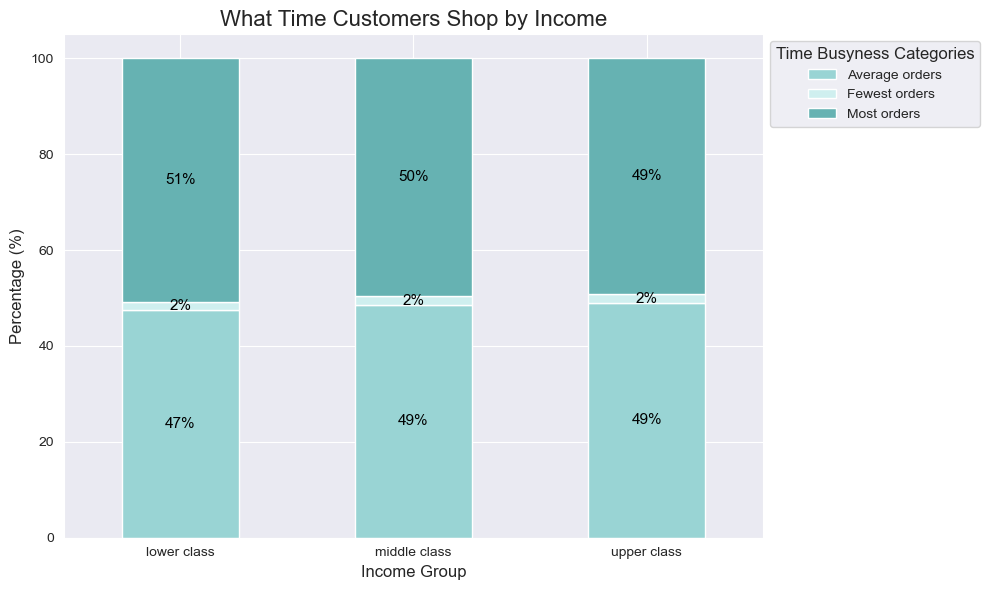

In [804]:
time_income = df.groupby(['income_group', 'hour_of_day_busyness']).size().reset_index(name='item_count')
time_income_pivot_data = time_income.pivot(index='income_group', columns='hour_of_day_busyness', values='item_count').fillna(0)

# calculate row totals
row_totals = time_income_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
income_time_percentage = time_income_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
time_income_stackedbar = income_time_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[teal5, light_teal5, dark_teal5])

# ---- LABELS --------------------

# title and axis labels
plt.title('What Time Customers Shop by Income', fontsize=16)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in time_income_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    time_income_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Time Busyness Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

#### 5f

**-- Loyalty vs Income --**

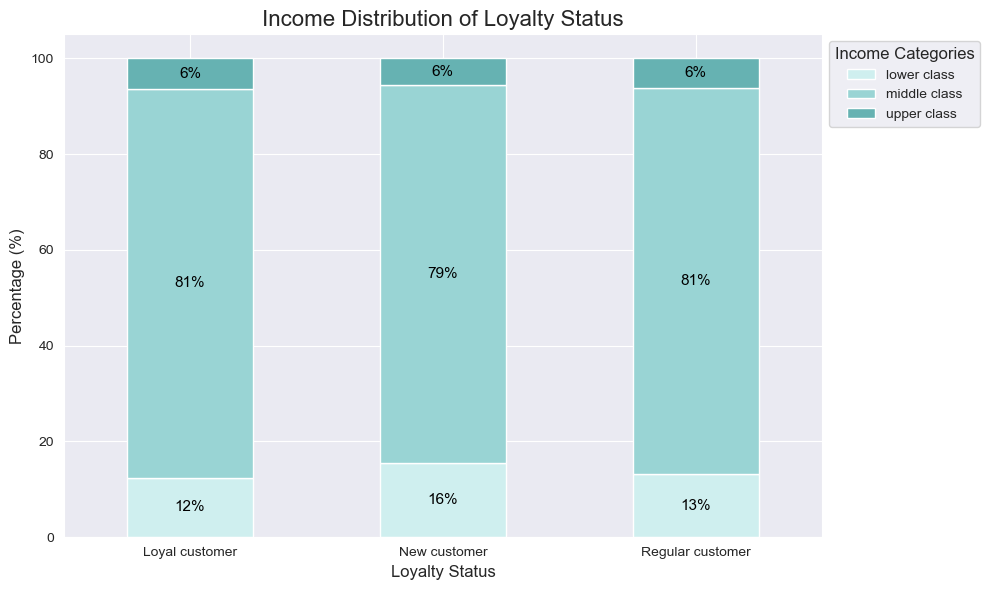

In [859]:
income_loyalty = df.groupby(['loyalty_flag', 'income_group']).size().reset_index(name='item_count')
income_loyalty_pivot_data = income_loyalty.pivot(index='loyalty_flag', columns='income_group', values='item_count').fillna(0)

# calculate row totals
row_totals = income_loyalty_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
income_loyalty_percentage = income_loyalty_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
income_loyalty_stackedbar = income_loyalty_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[light_teal5, teal5, dark_teal5])

# ---- LABELS --------------------

# title and axis labels
plt.title('Income Distribution of Loyalty Status', fontsize=16)
plt.xlabel('Loyalty Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in income_loyalty_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    income_loyalty_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Income Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

**-- Loyalty vs Age --**

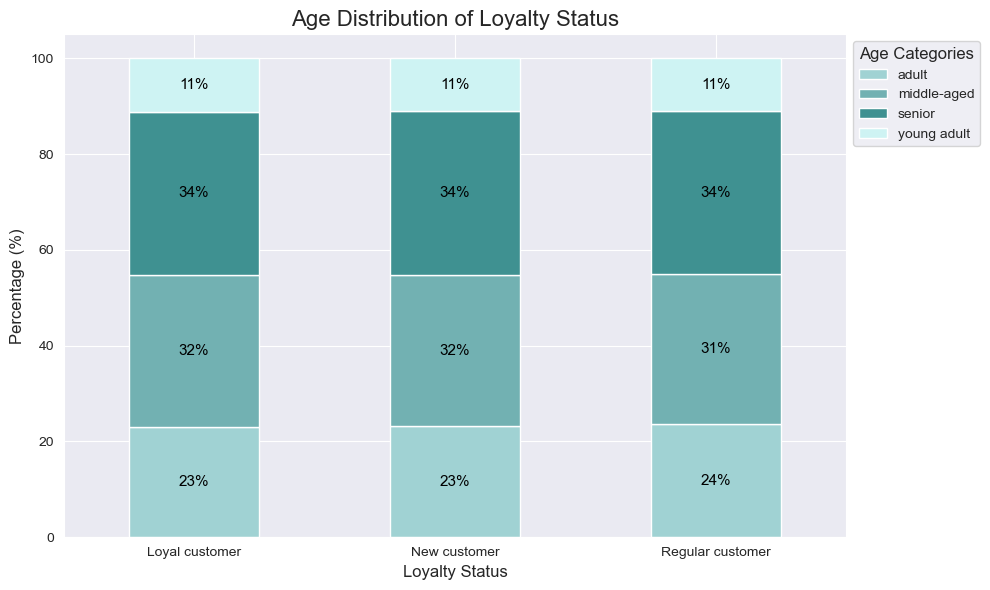

In [861]:
age_loyalty = df.groupby(['loyalty_flag', 'age_group']).size().reset_index(name='item_count')
age_loyalty_pivot_data = age_loyalty.pivot(index='loyalty_flag', columns='age_group', values='item_count').fillna(0)

# calculate row totals
row_totals = age_loyalty_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
age_loyalty_percentage = age_loyalty_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
age_loyalty_stackedbar = age_loyalty_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[teal3, dark_teal3, '#3f9191', light_teal3])

# ---- LABELS --------------------

# title and axis labels
plt.title('Age Distribution of Loyalty Status', fontsize=16)
plt.xlabel('Loyalty Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in age_loyalty_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    age_loyalty_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Age Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

**-- Loyalty vs Region --**

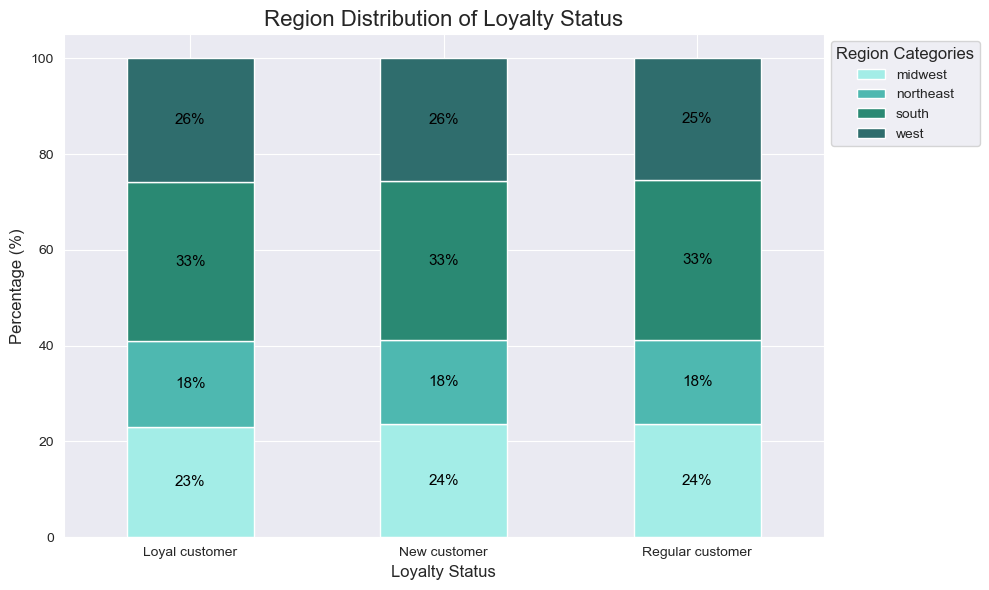

In [865]:
region_loyalty = df.groupby(['loyalty_flag', 'region']).size().reset_index(name='item_count')
region_loyalty_pivot_data = region_loyalty.pivot(index='loyalty_flag', columns='region', values='item_count').fillna(0)

# calculate row totals
row_totals = region_loyalty_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
region_loyalty_percentage = region_loyalty_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
region_loyalty_stackedbar = region_loyalty_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[light_teal2, teal2, dark_teal2, '#2f6d6d'])

# ---- LABELS --------------------

# title and axis labels
plt.title('Region Distribution of Loyalty Status', fontsize=16)
plt.xlabel('Loyalty Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in region_loyalty_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    region_loyalty_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=11, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Region Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

**-- Revenue by Region --**

In [909]:
# store the total prices spent by hour
total_spent_per_region = df.groupby('region')['prices'].sum().sort_values(ascending=True).reset_index()
total_spent_per_region.columns = ['region', 'sum_prices']
total_spent_per_region

,region,sum_prices
0,northeast,42516874.7
1,midwest,56574613.8
2,west,61746425.9
3,south,80356321.2


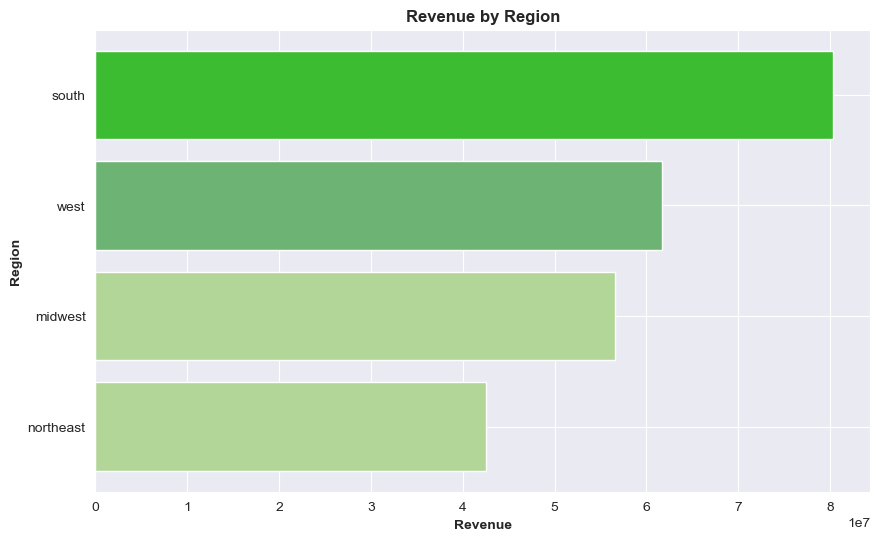

In [929]:
# ---- CREATE CHART --------------------

# set size
plt.figure(figsize=(10, 6)) 

# create horizontal bar chart
revenue_region_barhchart = plt.barh(total_spent_per_region.index, total_spent_per_region['sum_prices'], color=['#b1d697', '#b1d697', '#6db474', green])

# ---- LABELS --------------------

# set y-axis tick marks - assign labels to dep names
plt.yticks(ticks=total_spent_per_region.index, labels=['northeast', 'midwest', 'west', 'south'])

# add axis labels and title
plt.xlabel('Revenue', fontweight='bold')
plt.ylabel('Region', fontweight='bold')
plt.title('Revenue by Region', fontweight='bold')

# ---- EXPORT --------------------

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'revenue_region_barhchart.png'))

**-- Income Spending per Hour --**

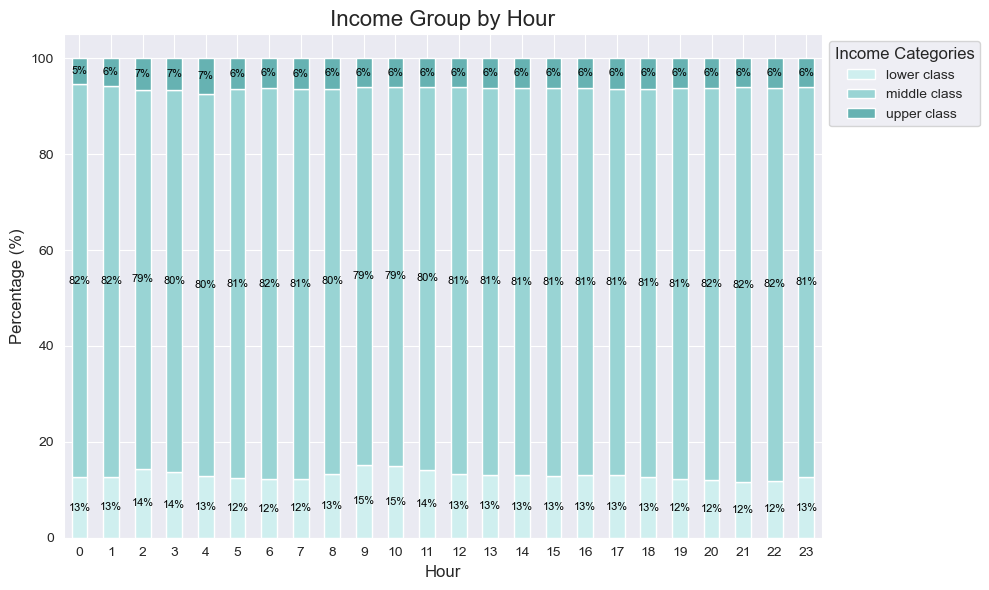

In [22]:
income_hour = df.groupby(['order_hour_of_day', 'income_group']).size().reset_index(name='item_count')
income_hour_pivot_data = income_hour.pivot(index='order_hour_of_day', columns='income_group', values='item_count').fillna(0)

# calculate row totals
row_totals = income_hour_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
income_hour_percentage = income_hour_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
income_hour_stackedbar = income_hour_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[light_teal5, teal5, dark_teal5])

# ---- LABELS --------------------

# title and axis labels
plt.title('Income Group by Hour', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in income_hour_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    income_hour_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=8, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Income Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

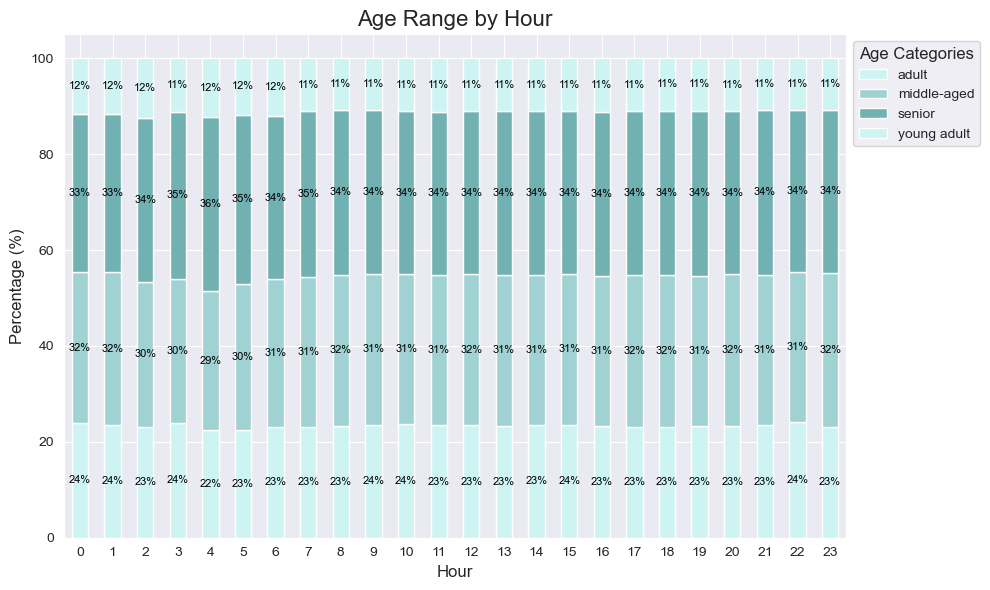

In [24]:
age_hour = df.groupby(['order_hour_of_day', 'age_group']).size().reset_index(name='item_count')
age_hour_pivot_data = age_hour.pivot(index='order_hour_of_day', columns='age_group', values='item_count').fillna(0)

# calculate row totals
row_totals = age_hour_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
age_hour_percentage = age_hour_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
age_hour_stackedbar = age_hour_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[light_teal3, teal3, dark_teal3])

# ---- LABELS --------------------

# title and axis labels
plt.title('Age Range by Hour', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in age_hour_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    age_hour_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=8, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Age Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

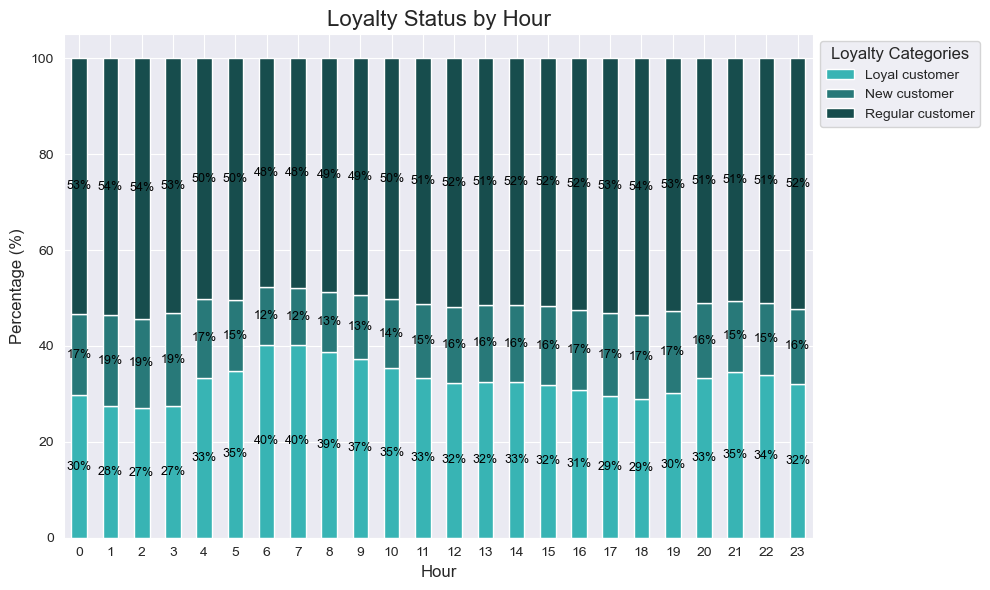

In [32]:
loyalty_hour = df.groupby(['order_hour_of_day', 'loyalty_flag']).size().reset_index(name='item_count')
loyalty_hour_pivot_data = loyalty_hour.pivot(index='order_hour_of_day', columns='loyalty_flag', values='item_count').fillna(0)

# calculate row totals
row_totals = loyalty_hour_pivot_data.sum(axis=1)
# get the percent by dividing each cell by row total
loyalty_hour_percentage = loyalty_hour_pivot_data.div(row_totals, axis=0) * 100

# ---- CREATE CHART --------------------

# create bar chart
loyalty_hour_stackedbar = loyalty_hour_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[light_teal, teal, dark_teal])

# ---- LABELS --------------------

# title and axis labels
plt.title('Loyalty Status by Hour', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# percentage labels on the bars
for p in loyalty_hour_stackedbar.patches:
    height = p.get_height()  # store height of each segment
    width = p.get_width()    # store width of each segment
    x_position = p.get_x() + width / 2  # store width's center
    y_position = p.get_y() + height / 2  # store height's center
    
    # add the percent label
    loyalty_hour_stackedbar.annotate(f'{height:.0f}%', (x_position, y_position), ha='center', va='center', fontsize=9, color='black')

# set x-axis text labels as horizontal
plt.xticks(rotation=0) 
# format legend
plt.legend(title='Loyalty Categories', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

## Exporting Figures

Q1

In [46]:
orders_per_day_barchart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_per_day_barchart.png'))

In [48]:
orders_per_hour_barchart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_per_hour_barchart.png'))

Q2

In [439]:
total_per_hour_barchart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'total_per_hour_barchart.png'))

In [431]:
avgOrderTotal_perHour_barchart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avgOrderTotal_perHour_barchart.png'))

In [449]:
avg_price_per_hour_barchart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_price_per_hour_barchart.png'))

In [441]:
avg_items_per_hour_barchart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_items_per_hour_barchart.png'))

Q3

*pie chart saved in Q3 section above*

In [461]:
normalized_daily_ranges_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'normalized_daily_ranges_stackedbar.png'))

Q4

*barh chart saved in Q4 section above*

Q5

A.

*5a pie chart saved in Q5 section above*

B.

In [525]:
order_total_loyalties_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_total_loyalties_barchart.png'))

In [527]:
frequency_loyalties_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'frequency_loyalties_stackedbar.png'))

In [531]:
item_quantity_loyalties_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'item_quantity_loyalties_stackedbar.png'))

In [600]:
day_loyalties_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'day_loyalties_stackedbar.png'))

In [818]:
hour_loyalties_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hour_loyalties_stackedbar.png'))

C.

In [677]:
spending_region_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_region_stackedbar.png'))

In [679]:
freq_region_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'freq_region_stackedbar.png'))

In [681]:
quantity_region_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'quantity_region_stackedbar.png'))

In [683]:
day_region_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'day_region_stackedbar.png'))

In [820]:
time_region_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'time_region_stackedbar.png'))

D.

In [715]:
spending_age_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_age_stackedbar.png'))

In [717]:
freq_age_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'freq_age_stackedbar.png'))

In [719]:
quantity_age_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'quantity_age_stackedbar.png'))

In [721]:
day_age_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'day_age_stackedbar.png'))

In [822]:
time_age_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'time_age_stackedbar.png'))

In [752]:
spending_dep_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_dep_stackedbar.png'))

In [760]:
freq_dep_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'freq_dep_stackedbar.png'))

In [764]:
quantity_dep_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'quantity_dep_stackedbar.png'))

In [768]:
day_dep_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'day_dep_stackedbar.png'))

In [824]:
time_dep_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'time_dep_stackedbar.png'))

E.

In [786]:
spending_income_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_income_stackedbar.png'))

In [790]:
freq_income_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'freq_income_stackedbar.png'))

In [794]:
quantity_income_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'quantity_income_stackedbar.png'))

In [798]:
day_income_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'day_income_stackedbar.png'))

In [806]:
time_income_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'time_income_stackedbar.png'))

F.

In [867]:
income_loyalty_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_loyalty_stackedbar.png'))

In [870]:
age_loyalty_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_loyalty_stackedbar.png'))

In [873]:
region_loyalty_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_loyalty_stackedbar.png'))

In [38]:
income_hour_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_hour_stackedbar.png'))

In [36]:
age_hour_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_hour_stackedbar.png'))

In [34]:
loyalty_hour_stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_hour_stackedbar.png'))